In [ ]:
import pandas as pd
from pathlib import Path
path = Path("Zenti_Business_Case_2&3/Dataset2_Needs.xls")

# Load each sheet into separate DataFrames
needs_df = pd.read_excel(path, sheet_name='Needs')
products_df = pd.read_excel(path, sheet_name='Products')
metadata_df = pd.read_excel(path, sheet_name='Metadata')

In [67]:
# Let's see the actual variables names in metadata_df
print("Metadata DataFrame columns:")
print(metadata_df.columns.tolist())

# Let's peek at the first few rows
print("\nFirst few rows of metadata:")
print(metadata_df.head())


Metadata DataFrame columns:
['Metadata', 'Unnamed: 1']

First few rows of metadata:
        Metadata                     Unnamed: 1
0        Clients                            NaN
1             ID                   Numerical ID
2            Age                  Age, in years
3         Gender  Gender (Female = 1, Male = 0)
4  FamilyMembers           Number of components


In [68]:
# Drop ID column as it's not needed for analysis
needs_df = needs_df.drop('ID', axis=1)

In [69]:
def create_variable_summary(df, metadata_df):
    # Create empty lists to store the chosen statistics
    stats_dict = {
        'Variable': [],
        'Description': [],
        'Mean': [],
        'Std': [],
        'Missing': [],
        'Min': [],
        'Max': []
    }

    # Create a metadata dictionary for easy lookup
    meta_dict = dict(zip(metadata_df['Metadata'], metadata_df['Unnamed: 1']))

    for col in df.columns:
        stats_dict['Variable'].append(col)
        stats_dict['Description'].append(meta_dict.get(col, 'N/A'))

        # Calculate some statistics for each column
        if pd.api.types.is_numeric_dtype(df[col]):
            stats_dict['Mean'].append(f"{df[col].mean():.2f}")
            stats_dict['Std'].append(f"{df[col].std():.2f}")
            stats_dict['Min'].append(f"{df[col].min():.2f}")
            stats_dict['Max'].append(f"{df[col].max():.2f}")
        else:
            stats_dict['Mean'].append('N/A')
            stats_dict['Std'].append('N/A')
            stats_dict['Min'].append('N/A')
            stats_dict['Max'].append('N/A')

        stats_dict['Missing'].append(df[col].isna().sum())

    return pd.DataFrame(stats_dict)


# Create summary tables
print("NEEDS VARIABLES SUMMARY:")
needs_summary = create_variable_summary(needs_df, metadata_df)
display(needs_summary.style
        .set_properties(**{'text-align': 'left'})
        .hide(axis='index'))

print("\nPRODUCTS VARIABLES SUMMARY:")
products_summary = create_variable_summary(products_df, metadata_df)
display(products_summary.style
        .set_properties(**{'text-align': 'left'})
        .hide(axis='index'))


NEEDS VARIABLES SUMMARY:


Variable,Description,Mean,Std,Missing,Min,Max
Age,"Age, in years",55.25,11.97,0,18.00,97.00
Gender,"Gender (Female = 1, Male = 0)",0.49,0.50,0,0.00,1.00
FamilyMembers,Number of components,2.51,0.76,0,1.00,5.00
FinancialEducation,Normalized level of Financial Education (estimate),0.42,0.15,0,0.04,0.90
RiskPropensity,Normalized Risk propensity from MIFID profile,0.36,0.15,0,0.02,0.88
Income,Income (thousands of euros); estimate,62.99,44.36,0,1.54,365.32
Wealth,Wealth (thousands of euros); sum of investments and cash accounts,93.81,105.47,0,1.06,2233.23
IncomeInvestment,Boolean variable for Income investment; 1 = High propensity,0.38,0.49,0,0.00,1.00
AccumulationInvestment,Boolean variable for Accumulation/growth investment; 1 = High propensity,0.51,0.50,0,0.00,1.00



PRODUCTS VARIABLES SUMMARY:


Variable,Description,Mean,Std,Missing,Min,Max
IDProduct,Product description,6.00,3.32,0,1.00,11.00
Type,"1 = Accumulation product, 0 = Income product",0.64,0.50,0,0.00,1.00
Risk,Normalized Synthetic Risk Indicator,0.43,0.24,0,0.12,0.88


### Explanation:
* ### plot_boxplot:
Creates a boxplot of a numeric feature. If you provide a grouping variable (e.g., Gender or Financial Education), it displays separate boxplots per group to identify outliers within each subgroup.

* ### plot_qq:
Uses scipy.stats.probplot to generate a Q–Q plot for any numeric feature, helping you assess normality by comparing against a standard normal distribution.

* ### plot_violin:
Produces a violin plot that shows the density and distribution of a numeric variable across categories. This is useful for comparing distributions (e.g., Income distributions across Gender groups).

* ### plot_joint_distribution:
Creates a joint plot that shows the scatter plot of two variables along with their marginal distributions, useful for exploring relationships between two features.

<br>

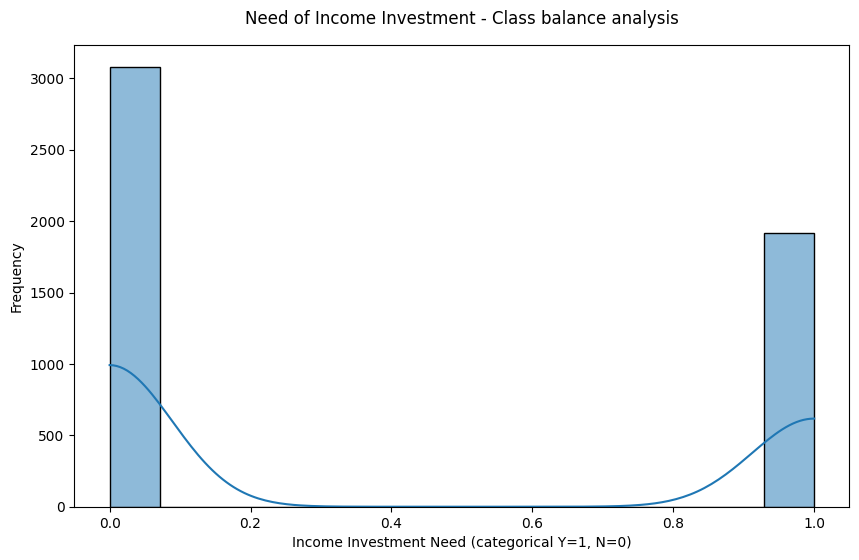

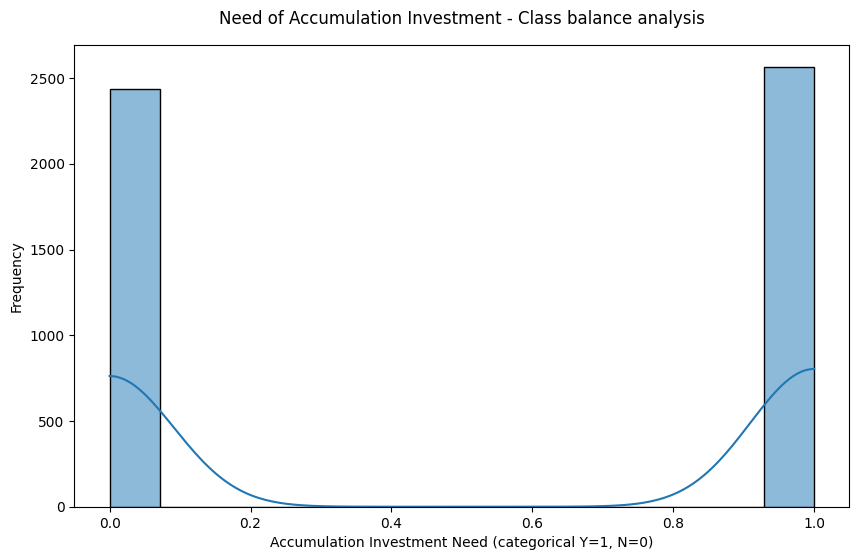

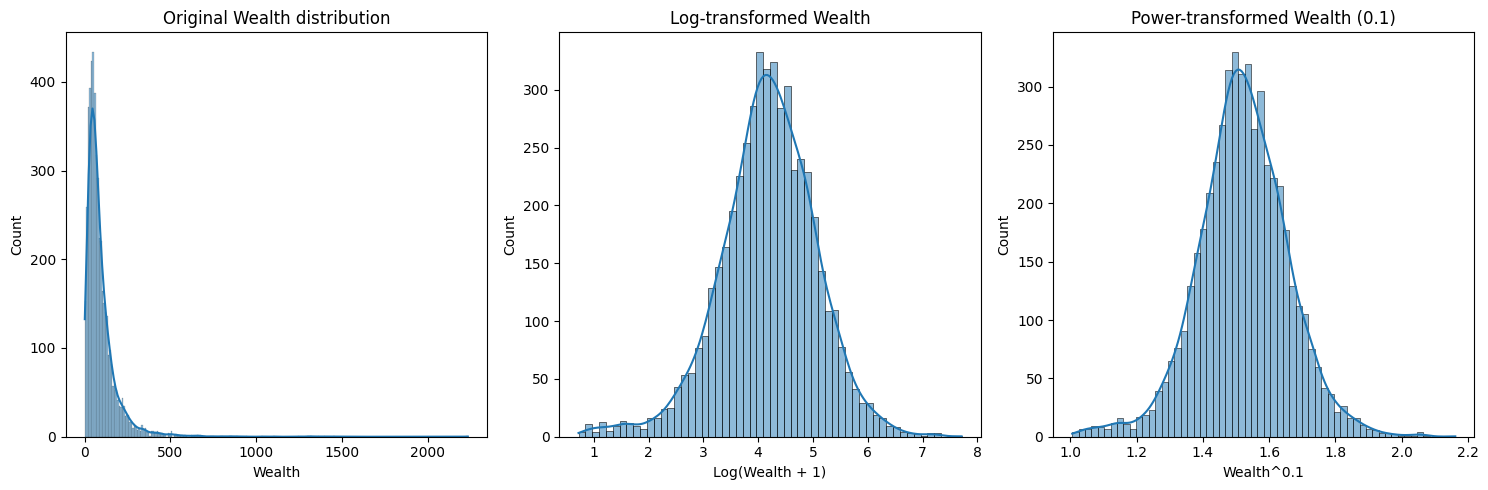

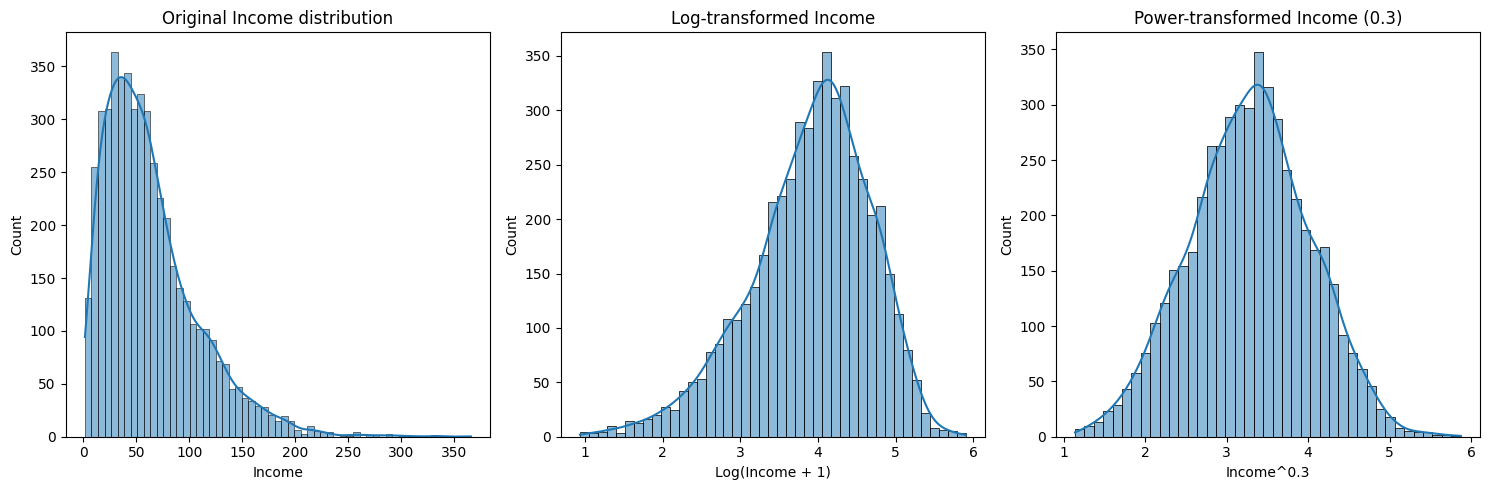

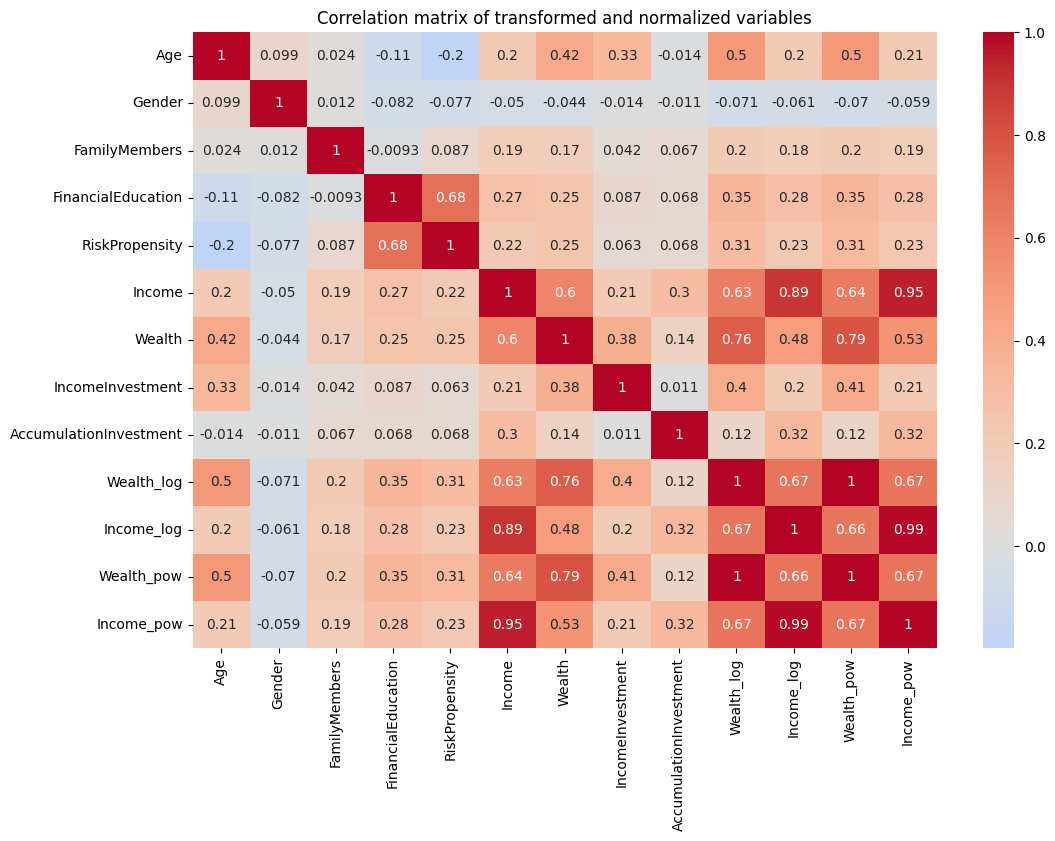

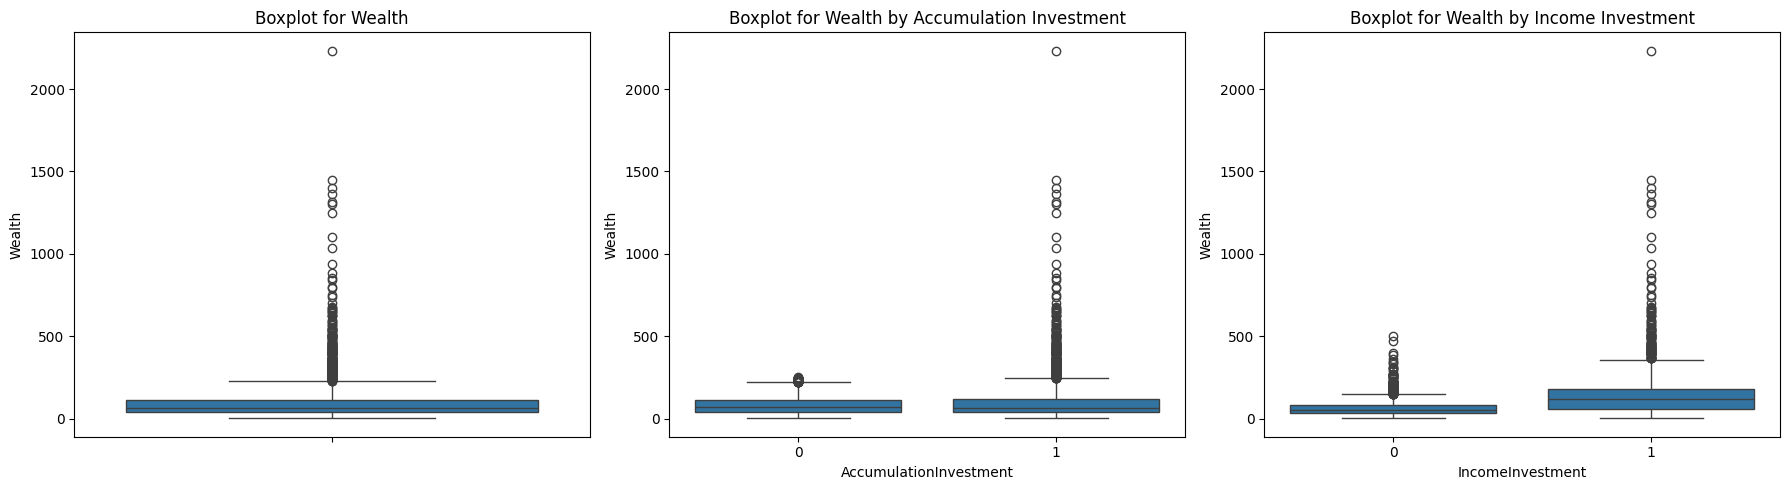

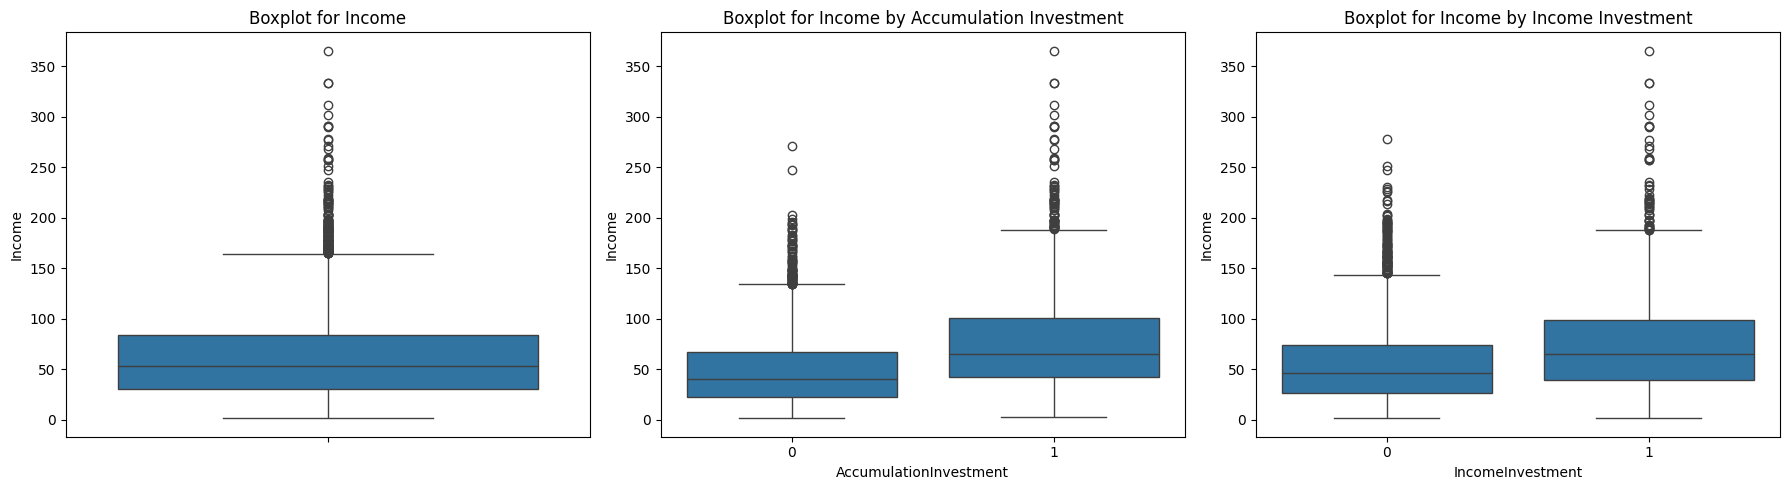

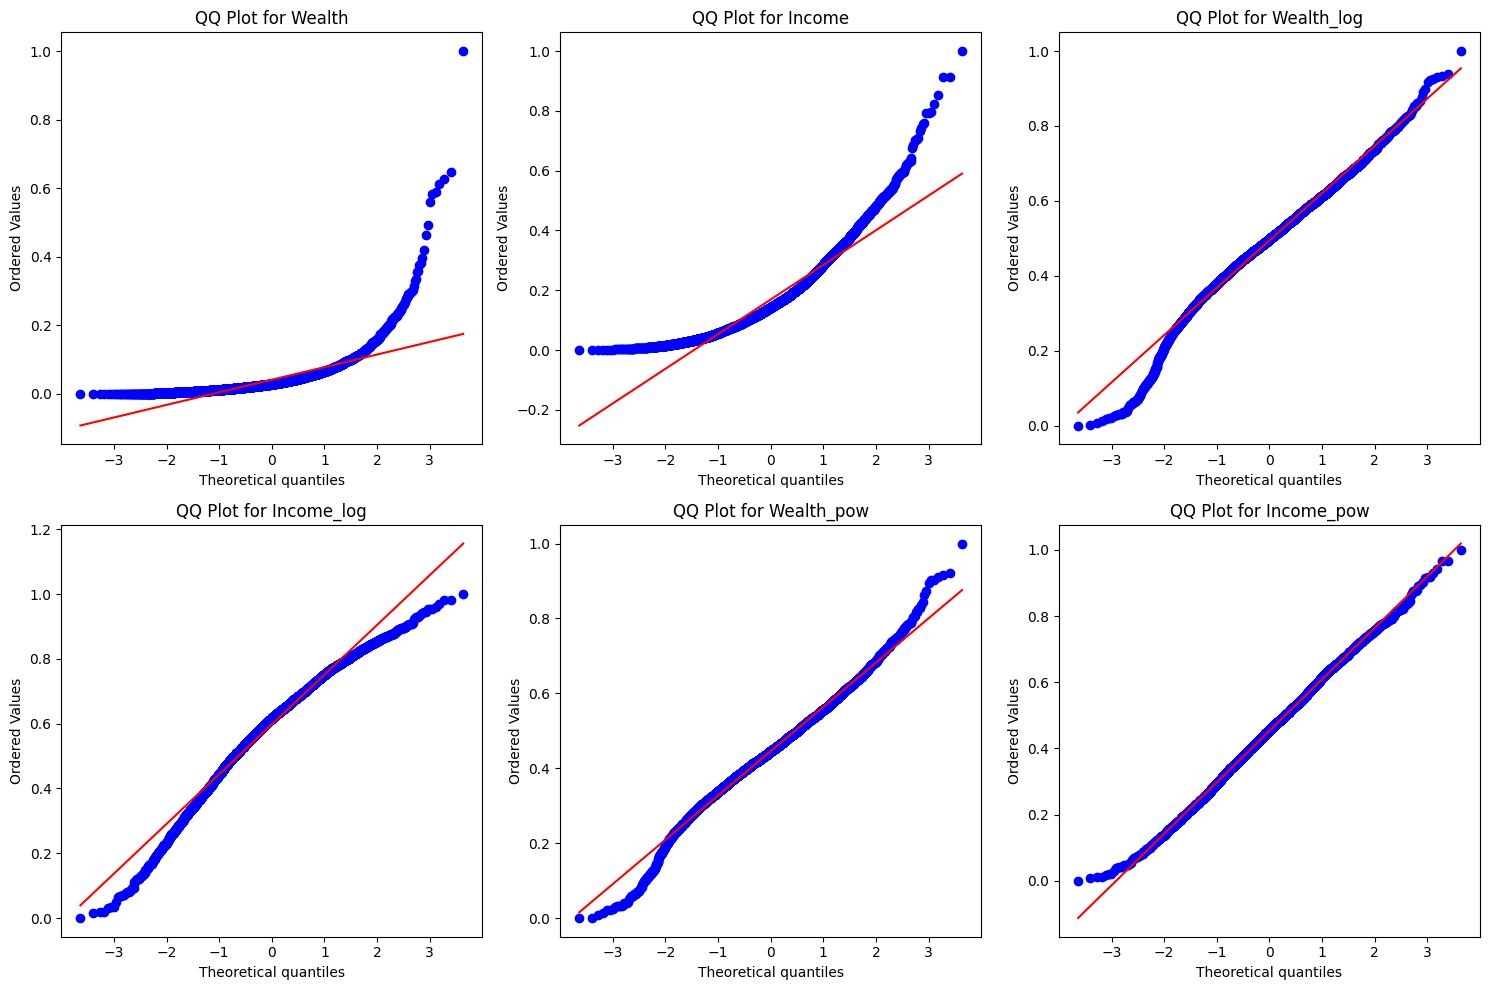

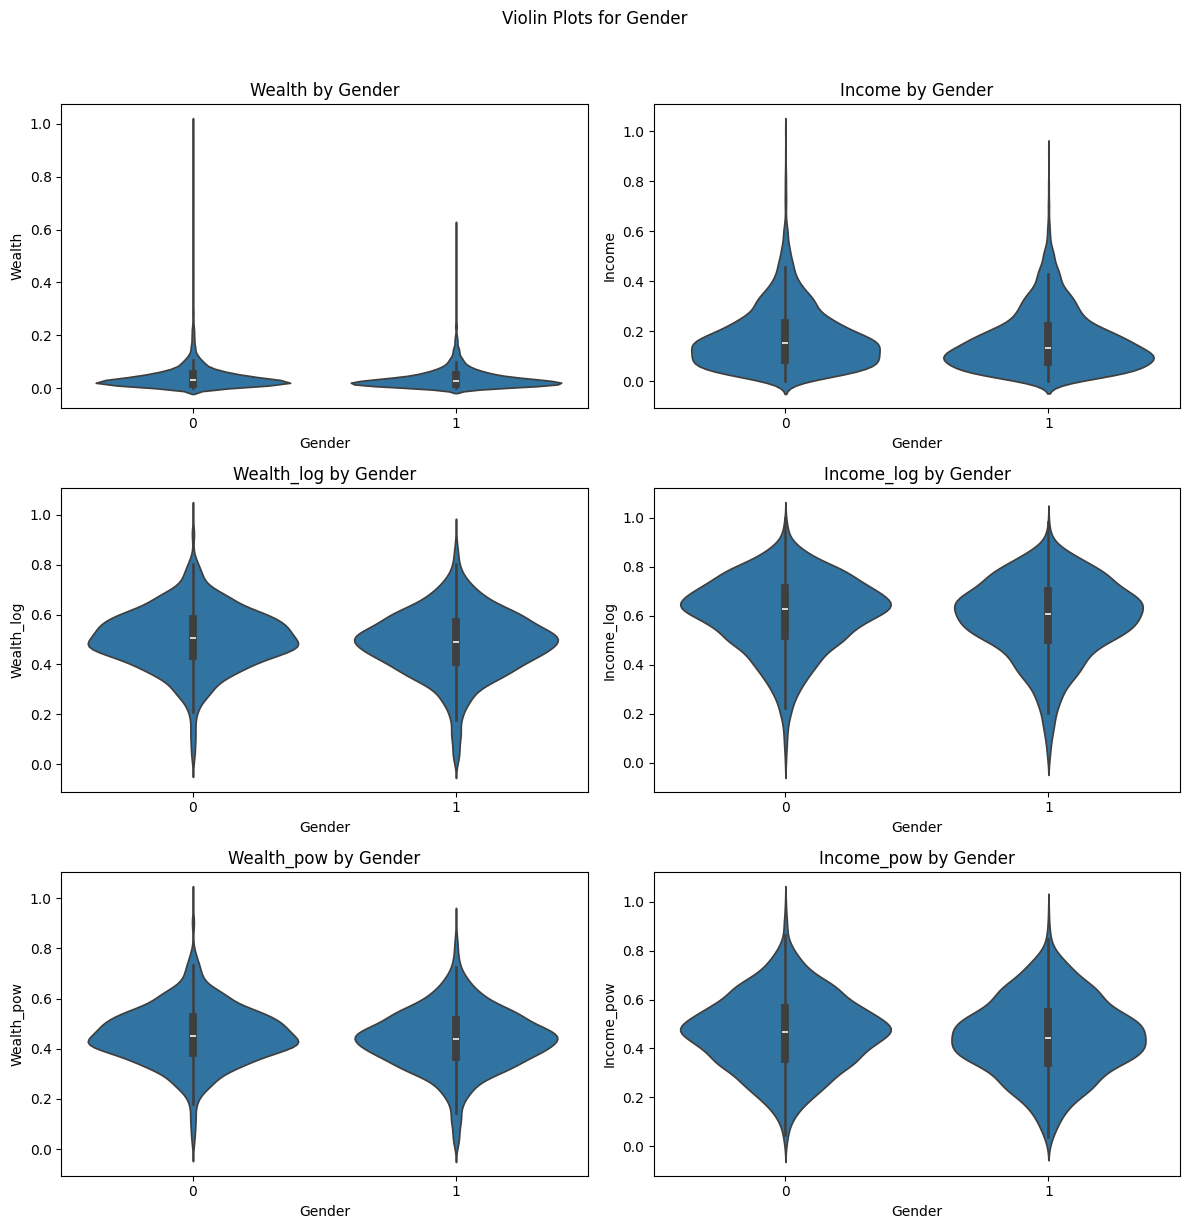

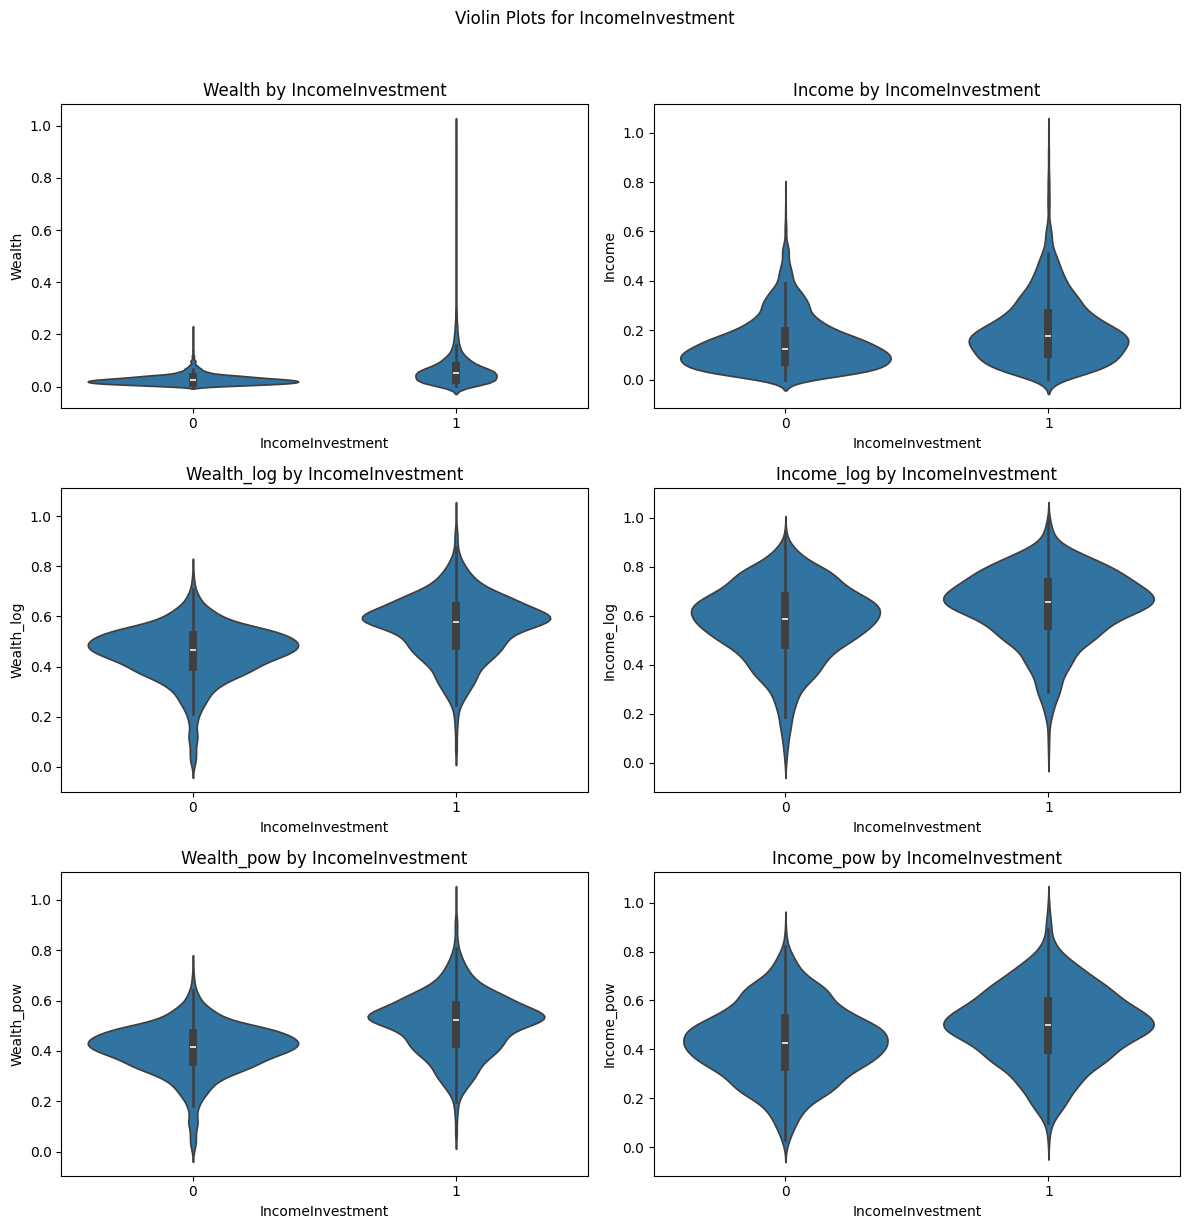

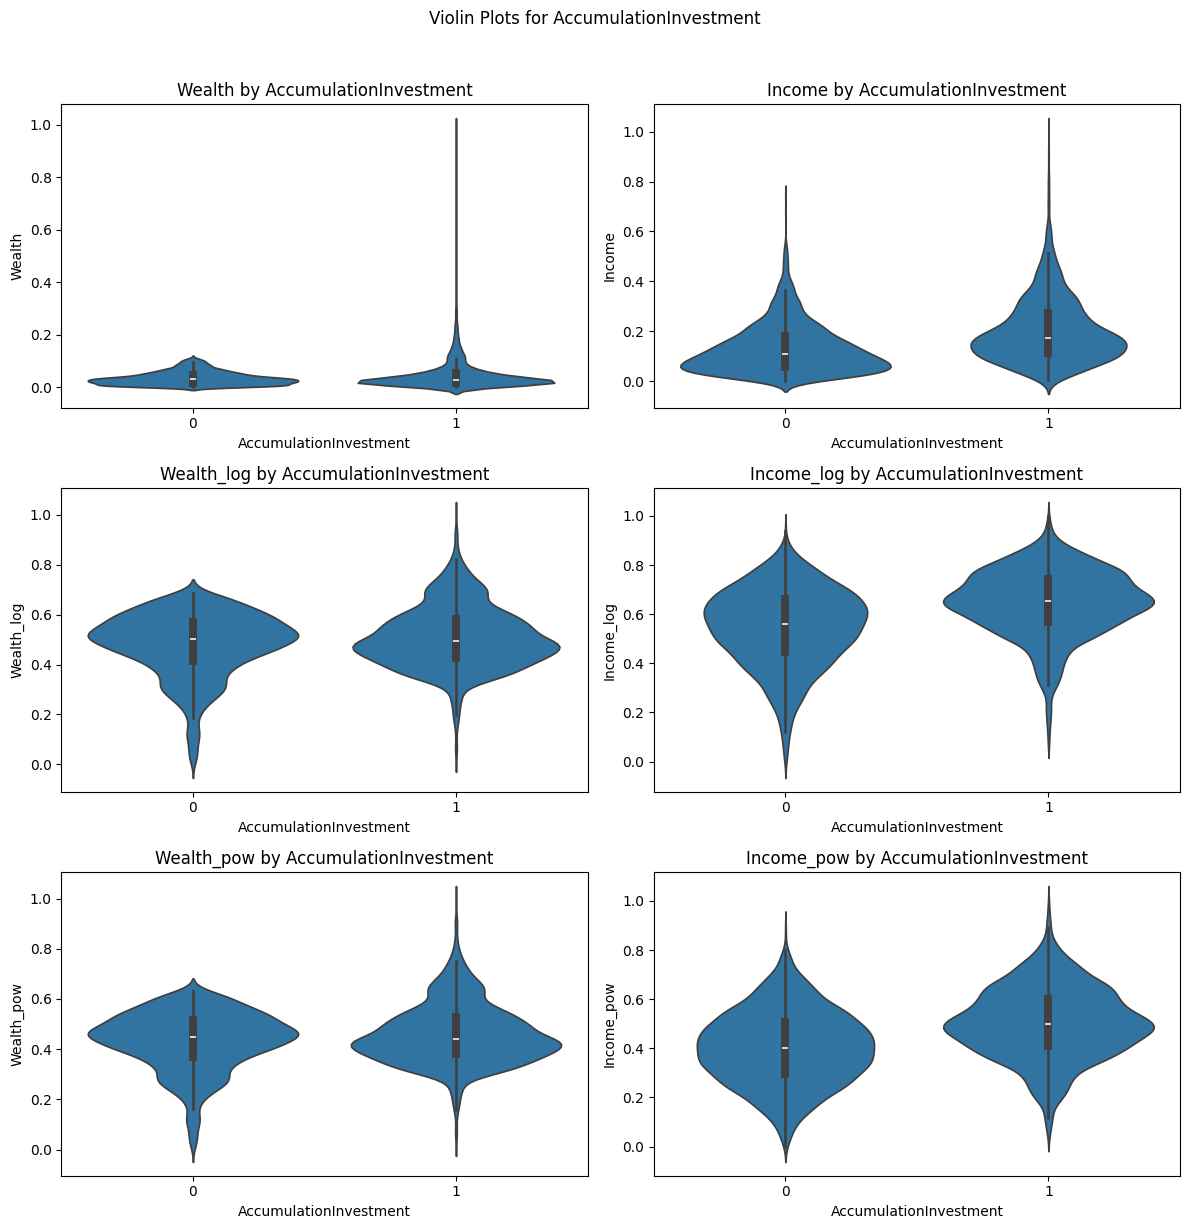

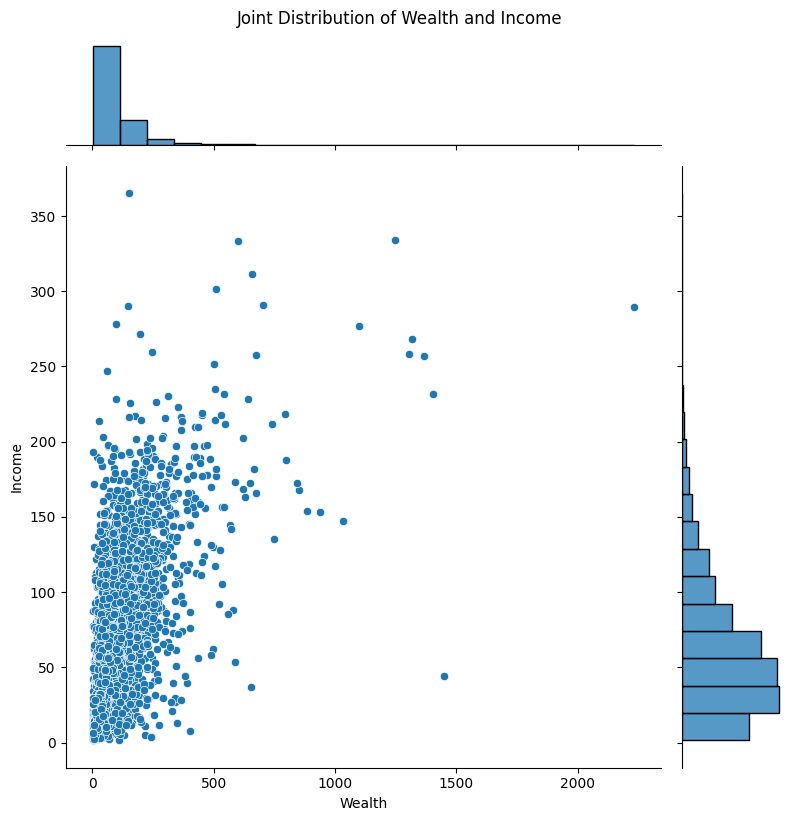

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import math

# Create df with all transformations and normalizations
transformed_df = needs_df.copy()

# Create a function for histogram plotting
def plot_histogram(data, title, xlabel, ylabel="Frequency"):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.title(title, pad=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Box Plot: To identify outliers in a numeric feature (optionally grouped by a categorical variable)
def plot_boxplot(data, feature, group=None, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(10, 6))
    if group:
        sns.boxplot(x=group, y=feature, data=data)
        plt.xlabel(xlabel if xlabel else group)
    else:
        sns.boxplot(y=data[feature])
    plt.title(title if title else f'Boxplot of {feature}')
    plt.ylabel(ylabel if ylabel else feature)
    plt.show()

# Q-Q Plot: To check if a numeric feature follows a normal distribution
def plot_qq(data, feature, title=None):
    plt.figure(figsize=(8, 6))
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(title if title else f'Q-Q Plot for {feature}')
    plt.show()

# Violin Plot: To compare the distribution of a numeric feature across categories
def plot_violin(data, numeric_feature, categorical_feature, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=categorical_feature, y=numeric_feature, data=data)
    plt.title(title if title else f'Violin Plot of {numeric_feature} by {categorical_feature}')
    plt.xlabel(xlabel if xlabel else categorical_feature)
    plt.ylabel(ylabel if ylabel else numeric_feature)
    plt.show()


# Joint Plot: To visualize the joint and marginal distributions of two features
def plot_joint_distribution(data, x_feature, y_feature, title=None):
    jp = sns.jointplot(data=data, x=x_feature, y=y_feature, kind='scatter', height=8, marginal_kws=dict(bins=20, fill=True))
    jp.figure.suptitle(title if title else f'Joint Distribution of {x_feature} and {y_feature}', y=1.02)
    plt.show()

# Function to plot multiple violin plots for several numeric features against one or more categorical features
def plot_multiple_violin_plots(data, numeric_features, categorical_features, ncols=2):
    for cat_feature in categorical_features:
        n = len(numeric_features)
        nrows = (n + ncols - 1) // ncols
        fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 4))
        axes = axes.flatten()
        for i, num_feature in enumerate(numeric_features):
            sns.violinplot(x=cat_feature, y=num_feature, data=data, ax=axes[i])
            axes[i].set_title(f'{num_feature} by {cat_feature}')
            axes[i].set_xlabel(cat_feature)
            axes[i].set_ylabel(num_feature)
        # Remove any extra axes if they exist
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        plt.suptitle(f'Violin Plots for {cat_feature}', y=1.02)
        plt.tight_layout()
        plt.show()


# Plot class balance histograms
plot_histogram(needs_df.IncomeInvestment,
              'Need of Income Investment - Class balance analysis',
              'Income Investment Need (categorical Y=1, N=0)')

plot_histogram(needs_df.AccumulationInvestment,
              'Need of Accumulation Investment - Class balance analysis',
              'Accumulation Investment Need (categorical Y=1, N=0)')

# Wealth transformation analysis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Original distribution
sns.histplot(needs_df.Wealth, kde=True, ax=ax1)
ax1.set_title('Original Wealth distribution')
ax1.set_xlabel('Wealth')

# Log transformation
sns.histplot(np.log1p(needs_df.Wealth), kde=True, ax=ax2)
ax2.set_title('Log-transformed Wealth')
ax2.set_xlabel('Log(Wealth + 1)')

# Power transformation
sns.histplot(np.power(needs_df.Wealth, 0.1), kde=True, ax=ax3)
ax3.set_title('Power-transformed Wealth (0.1)')
ax3.set_xlabel('Wealth^0.1')

plt.tight_layout()
plt.show()

# Wealth transformation analysis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Original distribution
sns.histplot(needs_df.Income, kde=True, ax=ax1)
ax1.set_title('Original Income distribution')
ax1.set_xlabel('Income')

# Log transformation
sns.histplot(np.log1p(needs_df.Income), kde=True, ax=ax2)
ax2.set_title('Log-transformed Income')
ax2.set_xlabel('Log(Income + 1)')

# Power transformation
sns.histplot(np.power(needs_df.Income, 0.3), kde=True, ax=ax3)
ax3.set_title('Power-transformed Income (0.3)')
ax3.set_xlabel('Income^0.3')

plt.tight_layout()
plt.show()


# Apply log transformations
transformed_df['Wealth_log'] = np.log1p(transformed_df['Wealth'])
transformed_df['Income_log'] = np.log1p(transformed_df['Income'])
transformed_df['Wealth_pow'] = np.power(transformed_df['Wealth'], 0.1)
transformed_df['Income_pow'] = np.power(transformed_df['Income'], 0.3)


# Apply MinMaxScaler to numerical variables
scaler = MinMaxScaler()
vars_to_normalize = ['Age', 'RiskPropensity', 'Wealth', 'Income', 'Wealth_log', 'Income_log' , 'Wealth_pow', 'Income_pow']
transformed_df[vars_to_normalize] = scaler.fit_transform(transformed_df[vars_to_normalize])

# Get all numeric columns including transformed ones (and not transformed, for comparison)
numeric_cols = transformed_df.select_dtypes(include=['float64', 'int64']).columns

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(transformed_df[numeric_cols].corr(),
            annot=True,
            cmap='coolwarm',
            center=0)
plt.title('Correlation matrix of transformed and normalized variables')
plt.show()

# # Create enhanced pairplot
# vars_to_plot = vars_to_normalize + ['IncomeInvestment', 'AccumulationInvestment']
# plt.figure(figsize=(15, 15))
# sns.pairplot(transformed_df[vars_to_plot],
#              diag_kind='hist',
#              plot_kws={'alpha': 0.6},
#              diag_kws={'bins': 20})
# plt.suptitle('Pairwise relationships between normalized variables', y=1.02)
# plt.show()

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Boxplot for Wealth overall
sns.boxplot(y=needs_df['Wealth'], ax=axes[0])
axes[0].set_title('Boxplot for Wealth')

# 2. Boxplot for Wealth by Accumulation Investment
sns.boxplot(x=needs_df['AccumulationInvestment'], y=needs_df['Wealth'], ax=axes[1])
axes[1].set_title('Boxplot for Wealth by Accumulation Investment')

# 3. Boxplot for Wealth by Income Investment
sns.boxplot(x=needs_df['IncomeInvestment'], y=needs_df['Wealth'], ax=axes[2])
axes[2].set_title('Boxplot for Wealth by Income Investment')

# Adjust layout to prevent overlapping labels/titles
plt.tight_layout()
plt.show()

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Boxplot for Income overall
sns.boxplot(y=needs_df['Income'], ax=axes[0])
axes[0].set_title('Boxplot for Income')

# 2. Boxplot for Income by Accumulation Investment
sns.boxplot(x=needs_df['AccumulationInvestment'], y=needs_df['Income'], ax=axes[1])
axes[1].set_title('Boxplot for Income by Accumulation Investment')

# 3. Boxplot for Income by Income Investment
sns.boxplot(x=needs_df['IncomeInvestment'], y=needs_df['Income'], ax=axes[2])
axes[2].set_title('Boxplot for Income by Income Investment')

# Adjust layout to prevent overlapping labels/titles
plt.tight_layout()
plt.show()

# Select numeric features from the DataFrame
numeric_features=['Wealth', 'Income', 'Wealth_log', 'Income_log', 'Wealth_pow', 'Income_pow']

num_features = len(numeric_features)
# Define number of columns for the grid
ncols = 3
nrows = math.ceil(num_features / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
axes = axes.flatten()  # flatten in case of a multi-row grid

# Loop over each numeric feature and plot the QQ plot
for i, feature in enumerate(numeric_features):
    # Use the feature column, dropping any NaN values to avoid errors
    stats.probplot(transformed_df[feature].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f"QQ Plot for {feature}")

# Remove any unused subplots if number of features is not a multiple of ncols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

plot_multiple_violin_plots(transformed_df, numeric_features=['Wealth', 'Income', 'Wealth_log', 'Income_log', 'Wealth_pow', 'Income_pow'], 
                           categorical_features=['Gender', 'IncomeInvestment', 'AccumulationInvestment'])

# Joint plot for 'Wealth' vs 'Income'
plot_joint_distribution(needs_df, 'Wealth', 'Income', title='Joint Distribution of Wealth and Income')


C:\Users\leona\AppData\Local\Temp\ipykernel_14496\2718261889.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = transformed_df.groupby('Wealth_log_bin')['AccumulationInvestment'].mean().reset_index()
C:\Users\leona\AppData\Local\Temp\ipykernel_14496\2718261889.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wealth_log_bin', y='AccumulationInvestment', data=mean_values, palette='viridis')


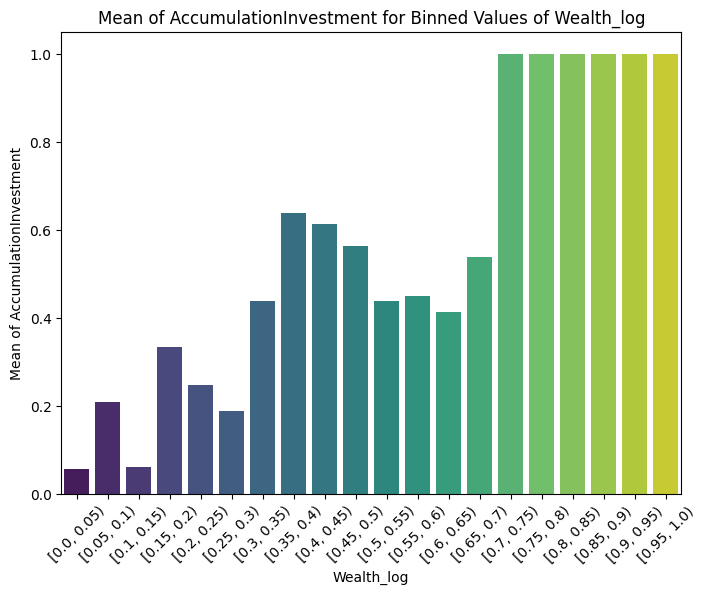

C:\Users\leona\AppData\Local\Temp\ipykernel_14496\2718261889.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = transformed_df.groupby('Wealth_log_bin')['IncomeInvestment'].mean().reset_index()
C:\Users\leona\AppData\Local\Temp\ipykernel_14496\2718261889.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wealth_log_bin', y='IncomeInvestment', data=mean_values, palette='viridis')


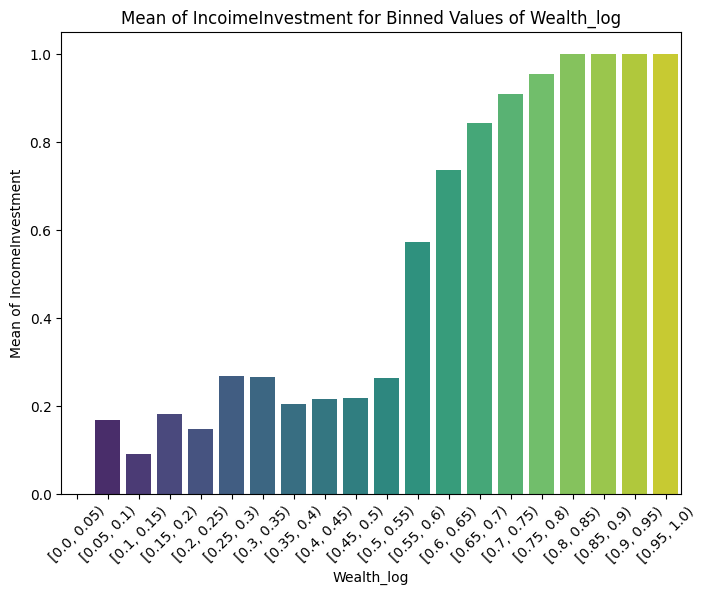

In [71]:
#we plot the mean value of outputs income and accumulation investment
#as a function of the wealth_log
#FINANCIAL INTERPRETATION: income investment only for high wealth,
#accumulation investment for low and very high wealth
#for indermediate wealth better to focus on income?

# Bin the covariate into ranges (e.g., intervals of 2)
bin_size = 0.05
transformed_df['Wealth_log_bin'] = pd.cut(transformed_df['Wealth_log'], bins=np.arange(0, transformed_df['Wealth_log'].max() + bin_size, bin_size), right=False)

# Group by the binned values and calculate the mean of the binary output
mean_values = transformed_df.groupby('Wealth_log_bin')['AccumulationInvestment'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Wealth_log_bin', y='AccumulationInvestment', data=mean_values, palette='viridis')

# Adding labels and title
plt.xlabel('Wealth_log')
plt.ylabel('Mean of AccumulationInvestment')
plt.title('Mean of AccumulationInvestment for Binned Values of Wealth_log')
plt.xticks(rotation=45)
plt.show()



# Bin the covariate into ranges (e.g., intervals of 2)
bin_size = 0.05
transformed_df['Wealth_log_bin'] = pd.cut(transformed_df['Wealth_log'], bins=np.arange(0, transformed_df['Wealth_log'].max() + bin_size, bin_size), right=False)

# Group by the binned values and calculate the mean of the binary output
mean_values = transformed_df.groupby('Wealth_log_bin')['IncomeInvestment'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Wealth_log_bin', y='IncomeInvestment', data=mean_values, palette='viridis')

# Adding labels and title
plt.xlabel('Wealth_log')
plt.ylabel('Mean of IncomeInvestment')
plt.title('Mean of IncoimeInvestment for Binned Values of Wealth_log')
plt.xticks(rotation=45)
plt.show()


# wealth -> log
# income -> pow

<br>

In [72]:
transformed_df.head()

,Age,Gender,FamilyMembers,FinancialEducation,RiskPropensity,Income,Wealth,IncomeInvestment,AccumulationInvestment,Wealth_log,Income_log,Wealth_pow,Income_pow,Wealth_log_bin
0,0.531646,0,2,0.228685,0.243105,0.183195,0.023386,0,1,0.468132,0.664782,0.417200,0.509280,"[0.45, 0.5)"
1,0.759494,0,2,0.358916,0.170321,0.055719,0.060252,1,0,0.600160,0.441614,0.543186,0.292169,"[0.6, 0.65)"
2,0.189873,1,2,0.317515,0.262161,0.059692,0.029230,0,1,0.498951,0.453970,0.445696,0.302518,"[0.45, 0.5)"
3,0.645570,1,4,0.767685,0.734110,0.452605,0.180963,1,1,0.756044,0.842246,0.706584,0.738969,"[0.75, 0.8)"
4,0.506329,0,3,0.429719,0.377948,0.054012,0.025918,0,0,0.482307,0.436064,0.430243,0.287575,"[0.45, 0.5)"


In [101]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Step 1: Feature engineering and transformation function
def prepare_features(df):
    X = df.copy()

    # Create Income/Wealth ratio
    X['Income_Wealth_Ratio'] = X['Income'].div(X['Wealth'].replace(0, np.nan)).fillna(X['Income'].max())
    X['Income_Wealth_Ratio_log'] = np.log1p(X['Income_Wealth_Ratio'])
    X['Family_Age_ratio'] = X['FamilyMembers'].div(X['Age'].replace(0, np.nan)).fillna(X['FamilyMembers'].max())
    X['Family_Age_ratio_log'] = np.log1p(X['Family_Age_ratio'])


    # Select features for modeling
    features_base = ['Age', 'Gender', 'FamilyMembers', 'FinancialEducation',
                    'RiskPropensity', 'Wealth_log', 'Income_pow']

    features_engineered = ['Age', 'Gender', 'FamilyMembers', 'FinancialEducation',
                          'RiskPropensity', 'Income_Wealth_Ratio_log', 'Family_Age_ratio_log']

    # Normalize all features
    scaler = MinMaxScaler()
    X_base = pd.DataFrame(scaler.fit_transform(X[features_base]), columns=features_base)
    X_engineered = pd.DataFrame(scaler.fit_transform(X[features_engineered]), columns=features_engineered)

    return X_base, X_engineered

# Step 2: Data split function
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test

# Step 3: Model training and evaluation function
def train_evaluate_model(X_train, y_train, X_test, y_test, model, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    cv_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        cv_metrics['accuracy'].append(accuracy_score(y_val_fold, y_val_pred))
        cv_metrics['precision'].append(precision_score(y_val_fold, y_val_pred))
        cv_metrics['recall'].append(recall_score(y_val_fold, y_val_pred))
        cv_metrics['f1'].append(f1_score(y_val_fold, y_val_pred))

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    return {
        'cv_metrics': {
            metric: {
                'mean': np.mean(scores),
                'std': np.std(scores)
            } for metric, scores in cv_metrics.items()
        },
        'test_metrics': {
            'accuracy': accuracy_score(y_test, y_test_pred),
            'precision': precision_score(y_test, y_test_pred),
            'recall': recall_score(y_test, y_test_pred),
            'f1': f1_score(y_test, y_test_pred)
        }
    }

# Step 4: Display results function
def display_results_table(results_dict, model_name, feature_type):
    cv_data = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
        'CV Mean': [
            results_dict['cv_metrics']['accuracy']['mean'],
            results_dict['cv_metrics']['precision']['mean'],
            results_dict['cv_metrics']['recall']['mean'],
            results_dict['cv_metrics']['f1']['mean']
        ],
        'CV Std': [
            results_dict['cv_metrics']['accuracy']['std'],
            results_dict['cv_metrics']['precision']['std'],
            results_dict['cv_metrics']['recall']['std'],
            results_dict['cv_metrics']['f1']['std']
        ],
        'Test Set': [
            results_dict['test_metrics']['accuracy'],
            results_dict['test_metrics']['precision'],
            results_dict['test_metrics']['recall'],
            results_dict['test_metrics']['f1']
        ]
    }

    df = pd.DataFrame(cv_data)
    df = df.round(3)

    print(f"\n{model_name} - {feature_type}")
    print("=" * 60)
    print(tabulate(df, headers='keys', tablefmt='pretty'))

# Step 5: Run full analysis
# Prepare features
X_base, X_engineered = prepare_features(transformed_df)
y_income = transformed_df['IncomeInvestment']
y_accum = transformed_df['AccumulationInvestment']

# Define models
models = {
    'SVM': SVC(),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Actually run analysis and display results
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nTarget Variable: {target_name}")
    print("=" * 80)

    X_base_train, X_base_test, y_train, y_test = split_data(X_base, y)
    X_eng_train, X_eng_test, _, _ = split_data(X_engineered, y)

    for model_name, model in models.items():
        results_base = train_evaluate_model(X_base_train, y_train, X_base_test, y_test, model)
        if results_base['test_metrics']['precision'] >= 0.8:
            display_results_table(results_base, model_name, "Base Features")

        results_eng = train_evaluate_model(X_eng_train, y_train, X_eng_test, y_test, model)
        if results_eng['test_metrics']['precision'] >= 0.8:
            display_results_table(results_base, model_name, "Enginnered Features")



Target Variable: Income Investment

SVM - Base Features
+---+-----------+---------+--------+----------+
|   |  Metric   | CV Mean | CV Std | Test Set |
+---+-----------+---------+--------+----------+
| 0 | Accuracy  |  0.772  | 0.013  |  0.748   |
| 1 | Precision |  0.817  | 0.018  |   0.8    |
| 2 |  Recall   |  0.524  | 0.036  |  0.458   |
| 3 |    F1     |  0.637  | 0.022  |  0.583   |
+---+-----------+---------+--------+----------+

Target Variable: Accumulation Investment


* XGBoost
* LightGBM
* CatBoost

<br>

In [102]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Updated XGBoost configuration
models = {
    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss'
    ),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        objective='binary',
        metric='binary_logloss',
        force_col_wise= 'true',
        verbose=-1      
    ),
    'CatBoost': CatBoostClassifier(
        iterations=1000,
        learning_rate=0.1,
        depth=6,
        random_state=42,
        verbose=0  # Suppress training output
    )
}

for model_name, model in models.items():

    # Run the analysis for each target variable
    for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
        print(f"\nModel: {model_name} | Target Variable: {target_name}")
        print("=" * 80)

        # Splitting data for base and engineered feature sets
        X_base_train, X_base_test, y_train, y_test = split_data(X_base, y)
        X_eng_train, X_eng_test, _, _ = split_data(X_engineered, y)

        results_base = train_evaluate_model(X_base_train, y_train, X_base_test, y_test, model)
        if results_base['test_metrics']['precision'] >= 0.8:
            display_results_table(results_base, model_name, "Base Features")

        results_eng = train_evaluate_model(X_eng_train, y_train, X_eng_test, y_test, model)
        if results_eng['test_metrics']['precision'] >= 0.8:
            display_results_table(results_base, model_name, "Enginnered Features")



Model: XGBoost | Target Variable: Income Investment

Model: XGBoost | Target Variable: Accumulation Investment

Model: LightGBM | Target Variable: Income Investment

LightGBM - Base Features
+---+-----------+---------+--------+----------+
|   |  Metric   | CV Mean | CV Std | Test Set |
+---+-----------+---------+--------+----------+
| 0 | Accuracy  |  0.808  | 0.014  |  0.779   |
| 1 | Precision |  0.842  | 0.025  |  0.827   |
| 2 |  Recall   |  0.617  | 0.027  |  0.536   |
| 3 |    F1     |  0.712  | 0.016  |  0.651   |
+---+-----------+---------+--------+----------+

Model: LightGBM | Target Variable: Accumulation Investment

LightGBM - Base Features
+---+-----------+---------+--------+----------+
|   |  Metric   | CV Mean | CV Std | Test Set |
+---+-----------+---------+--------+----------+
| 0 | Accuracy  |  0.804  | 0.005  |   0.78   |
| 1 | Precision |  0.855  | 0.015  |  0.808   |
| 2 |  Recall   |  0.743  | 0.016  |  0.749   |
| 3 |    F1     |  0.795  | 0.009  |  0.777   |
+-


Feature Importance for Income Investment


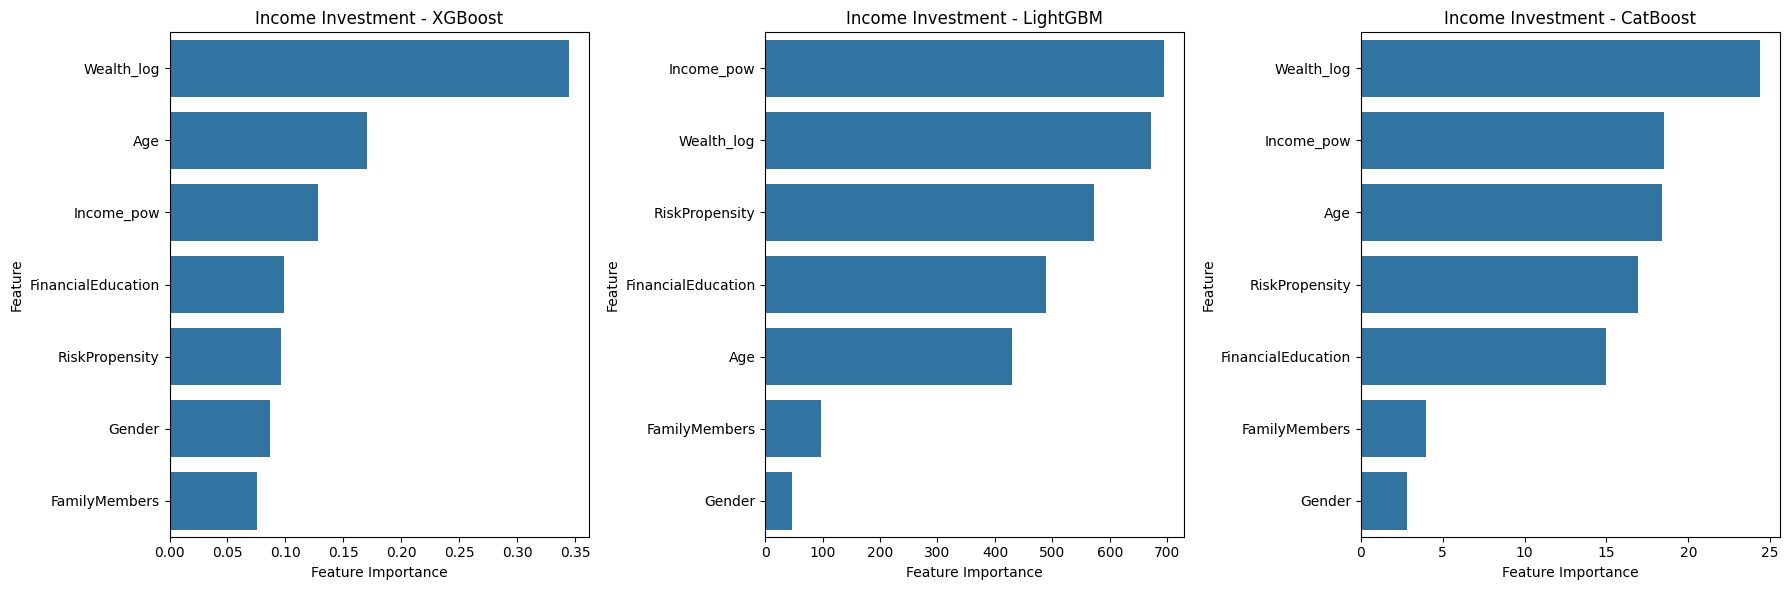


Feature Importance for Accumulation Investment


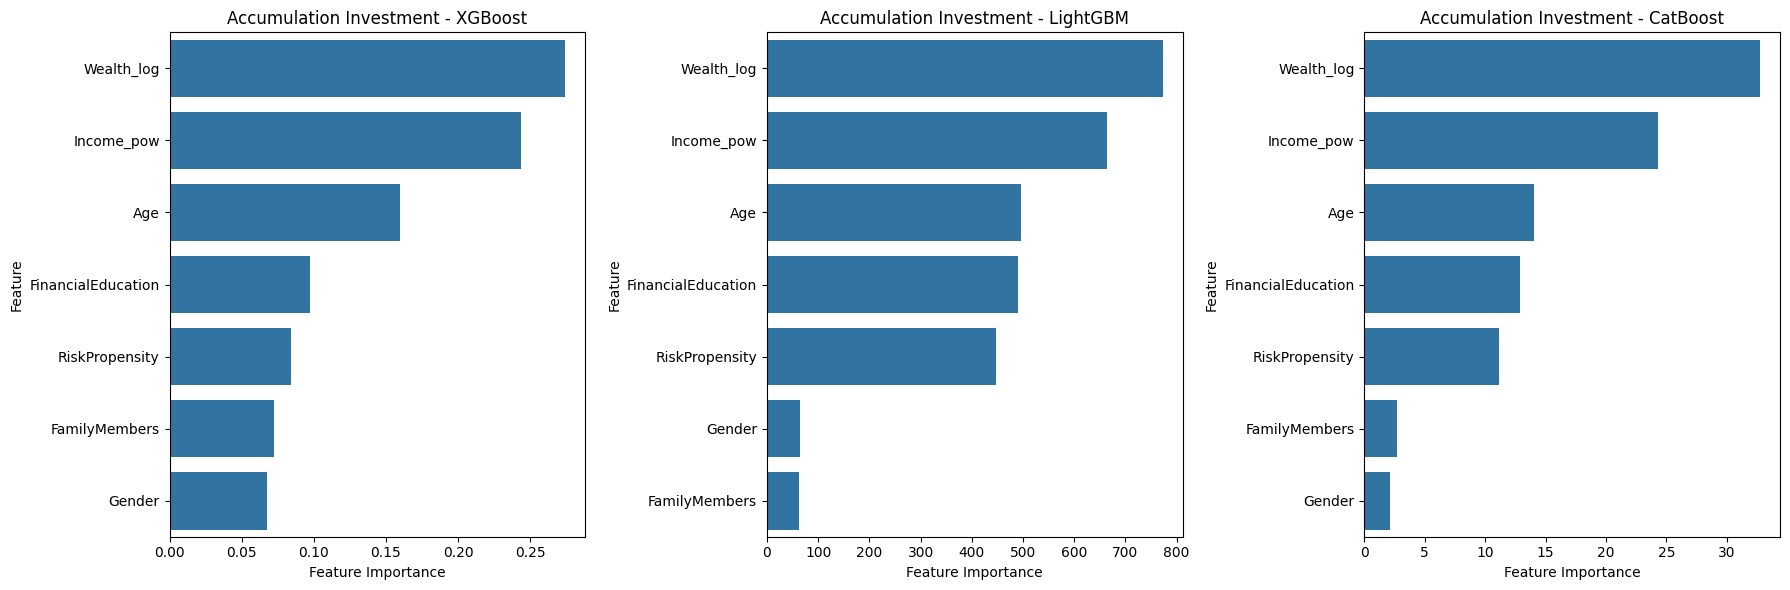

In [ ]:
# Rewrite the function, returning the trained model
def train_evaluate_model(X_train, y_train, X_test, y_test, model, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    cv_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        cv_metrics['accuracy'].append(accuracy_score(y_val_fold, y_val_pred))
        cv_metrics['precision'].append(precision_score(y_val_fold, y_val_pred))
        cv_metrics['recall'].append(recall_score(y_val_fold, y_val_pred))
        cv_metrics['f1'].append(f1_score(y_val_fold, y_val_pred))

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    return {
        'cv_metrics': {
            metric: {
                'mean': np.mean(scores),
                'std': np.std(scores)
            } for metric, scores in cv_metrics.items()
        },
        'test_metrics': {
            'accuracy': accuracy_score(y_test, y_test_pred),
            'precision': precision_score(y_test, y_test_pred),
            'recall': recall_score(y_test, y_test_pred),
            'f1': f1_score(y_test, y_test_pred)
        },
        'model': model
    }

def plot_feature_importance_ax(model, feature_names, title, ax):
    """
    Plots feature importance on the provided axis.
    
    Parameters:
        model: Trained model with a 'feature_importances_' attribute.
        feature_names (iterable): List of feature names.
        title (str): Title for the plot.
        ax (matplotlib.axes.Axes): Axis to plot on.
    """
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    sns.barplot(data=importances, x='importance', y='feature', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Feature')


# Iterate over each target variable and create subplots for each model
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nFeature Importance for {target_name}")
    print("=" * 50)
    
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(num_models * 6, 6))
    
    # If only one model exists, wrap axes in a list for consistency
    if num_models == 1:
        axes = [axes]
    
    for ax, (model_name, model) in zip(axes, models.items()):
        # Split the data for the current target
        X_base_train, X_base_test, y_train, y_test = split_data(X_base, y)
        # Train and evaluate the model (the function returns the trained model)
        results = train_evaluate_model(X_base_train, y_train, X_base_test, y_test, model)
        # Plot feature importance on the provided axis
        plot_feature_importance_ax(
            results['model'],
            X_base.columns,
            f'{target_name} - {model_name}',
            ax
        )
    
    plt.tight_layout()
    plt.show()


Feature Importance for Income Investment


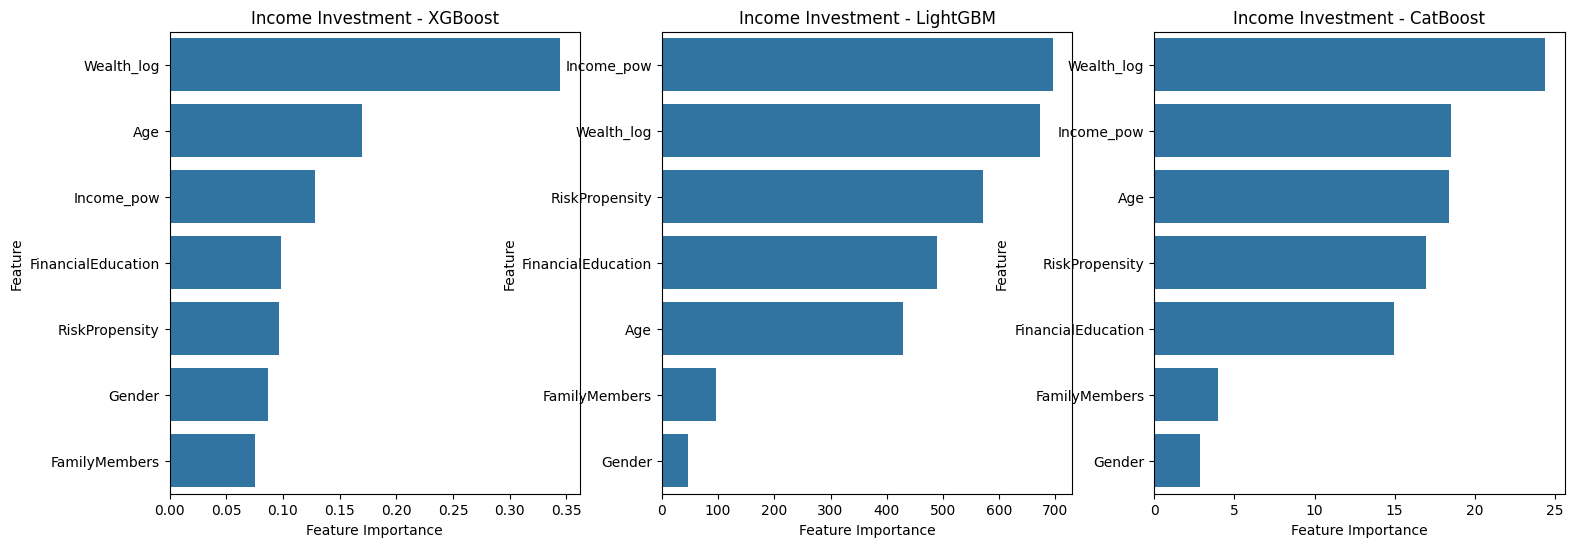

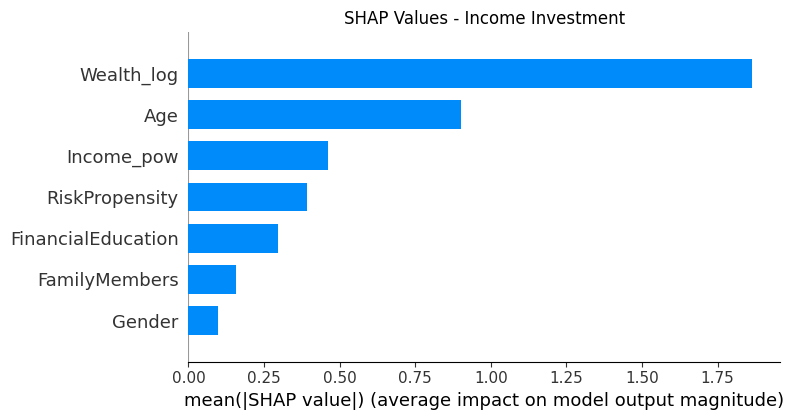

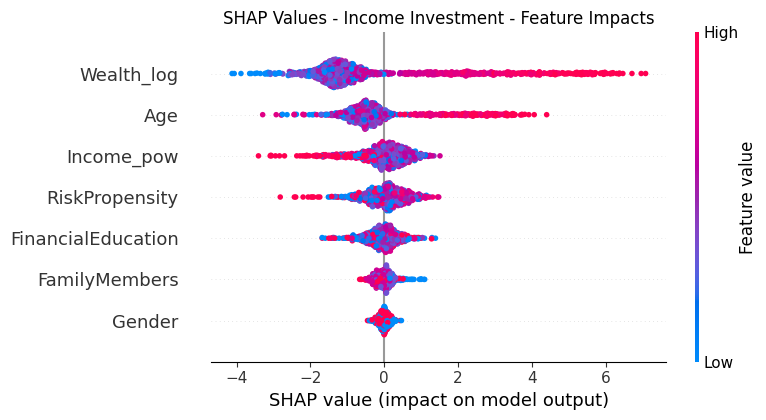


Feature Importance for Accumulation Investment


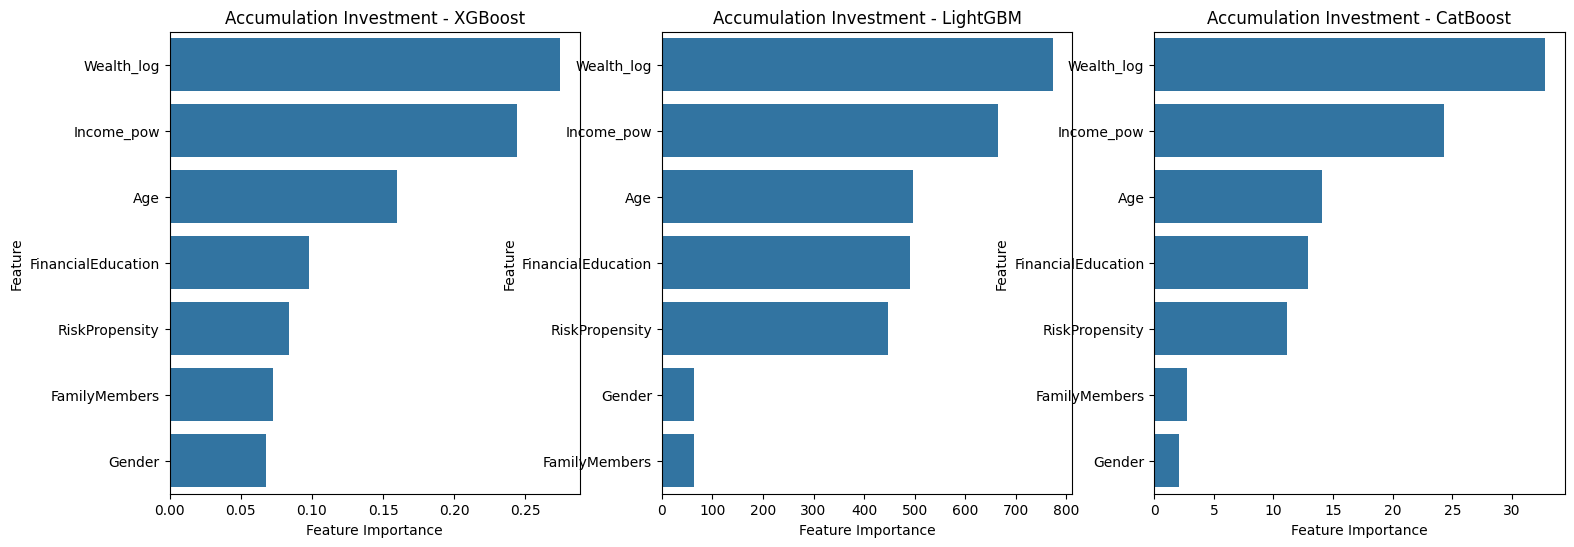

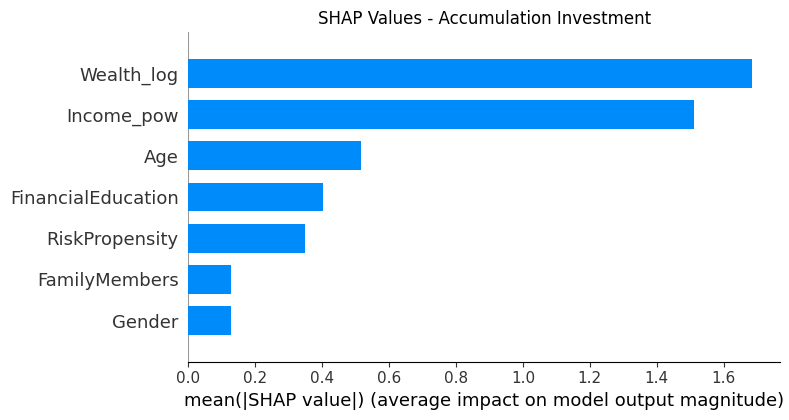

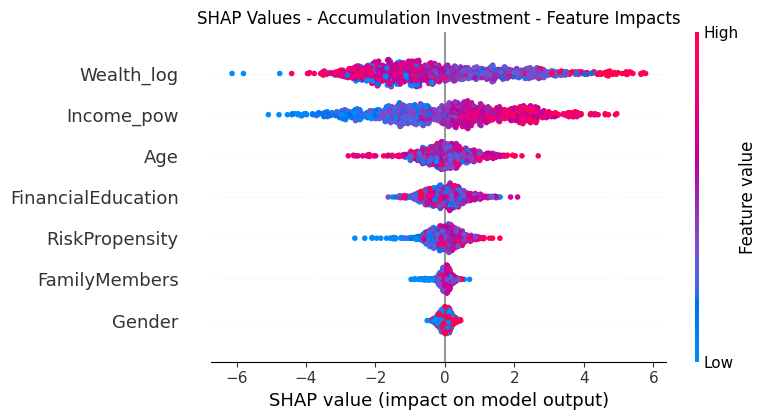

In [76]:
import shap

def plot_shap_values(model, X, title):
    """
    Generates two SHAP plots for the given model and dataset X:
    - A bar plot of the aggregated absolute SHAP values (global feature importance).
    - A summary (dot) plot that shows the distribution of SHAP values per feature.
    """
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Bar plot of aggregated SHAP values (global importance)
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    # Summary plot (dot plot) showing feature impact distributions
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X, show=False)
    plt.title(f"{title} - Feature Impacts")
    plt.tight_layout()
    plt.show()

# Iterate over each target variable
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nFeature Importance for {target_name}")
    print("=" * 50)
    
    num_models = len(models)
    # Create subplots for feature importance from each model
    fig, axes = plt.subplots(1, num_models, figsize=(num_models * 6, 6))
    if num_models == 1:
        axes = [axes]
    
    # For each model, split data, train, and plot feature importance on the designated axis
    for ax, (model_name, model) in zip(axes, models.items()):
        # Split the data for the current target variable
        X_base_train, X_base_test, y_train, y_test = split_data(X_base, y)
        # Train and evaluate the model (the function returns the final trained model)
        results = train_evaluate_model(X_base_train, y_train, X_base_test, y_test, model)
        # Plot traditional feature importance on the provided axis
        plot_feature_importance_ax(
            results['model'],
            X_base.columns,
            f'{target_name} - {model_name}',
            ax
        )
    
    # After plotting traditional feature importance for all models,
    # generate SHAP analysis for the last model in the loop (or adjust as needed)
    plot_shap_values(results['model'], X_base_test, f'SHAP Values - {target_name}')

In [77]:
X_base.head()

,Age,Gender,FamilyMembers,FinancialEducation,RiskPropensity,Wealth_log,Income_pow
0,0.531646,0.0,0.25,0.222172,0.243105,0.468132,0.509280
1,0.759494,0.0,0.25,0.372410,0.170321,0.600160,0.292169
2,0.189873,1.0,0.25,0.324649,0.262161,0.498951,0.302518
3,0.645570,1.0,0.75,0.843975,0.734110,0.756044,0.738969
4,0.506329,0.0,0.50,0.454090,0.377948,0.482307,0.287575



Feature Importance for Income Investment


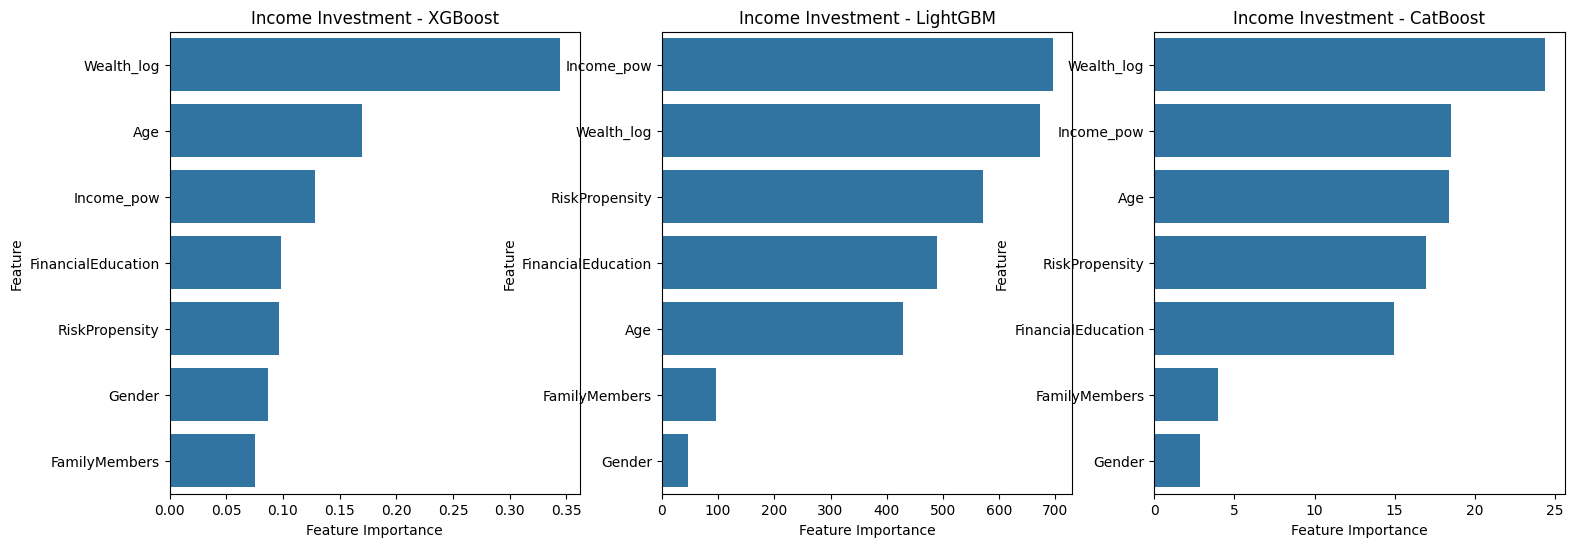

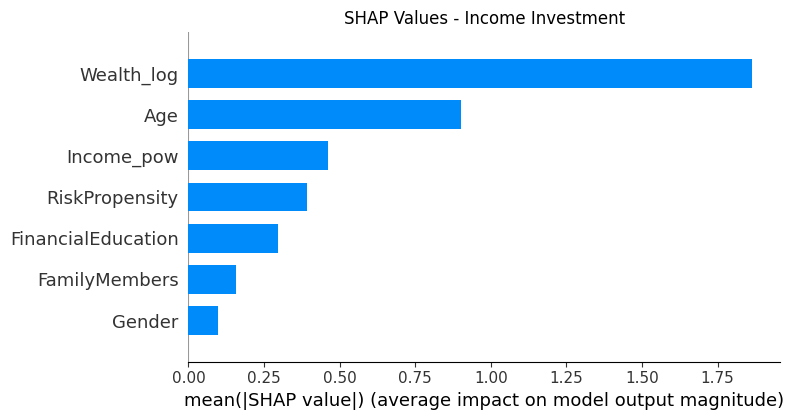

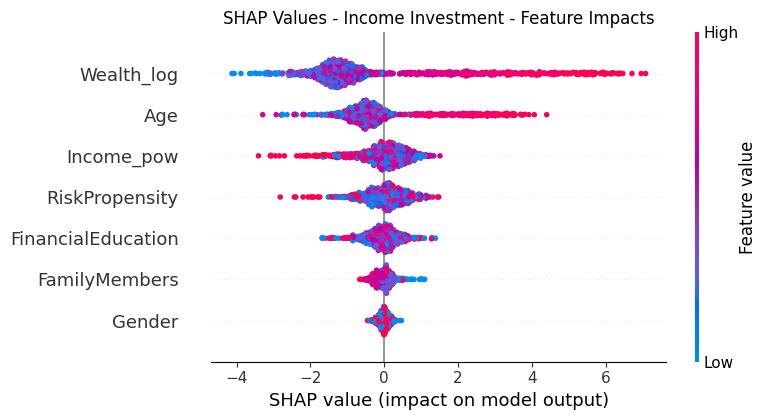

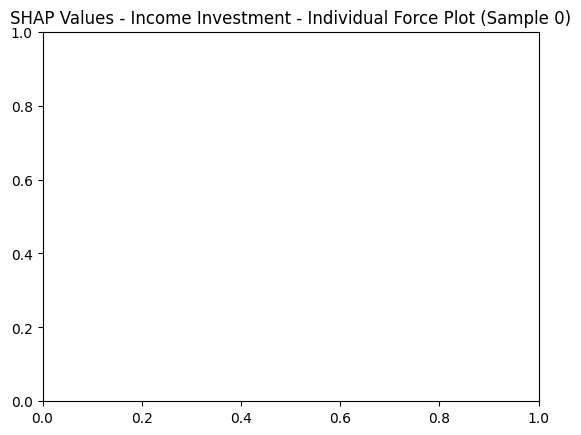

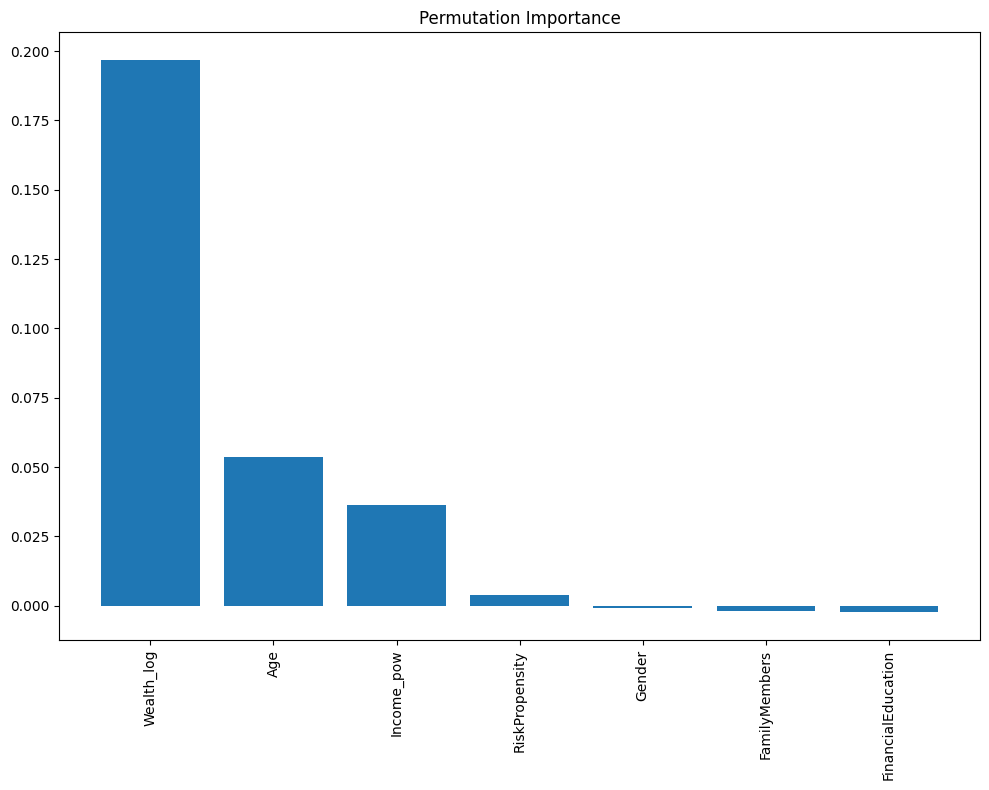

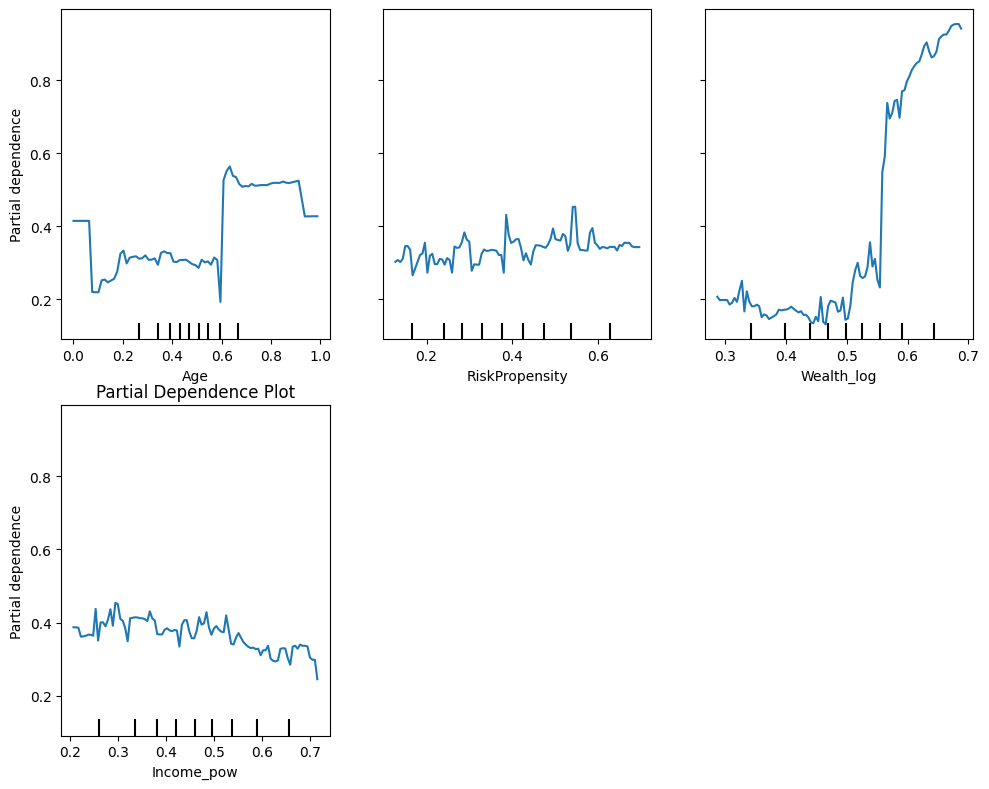


Feature Importance for Accumulation Investment


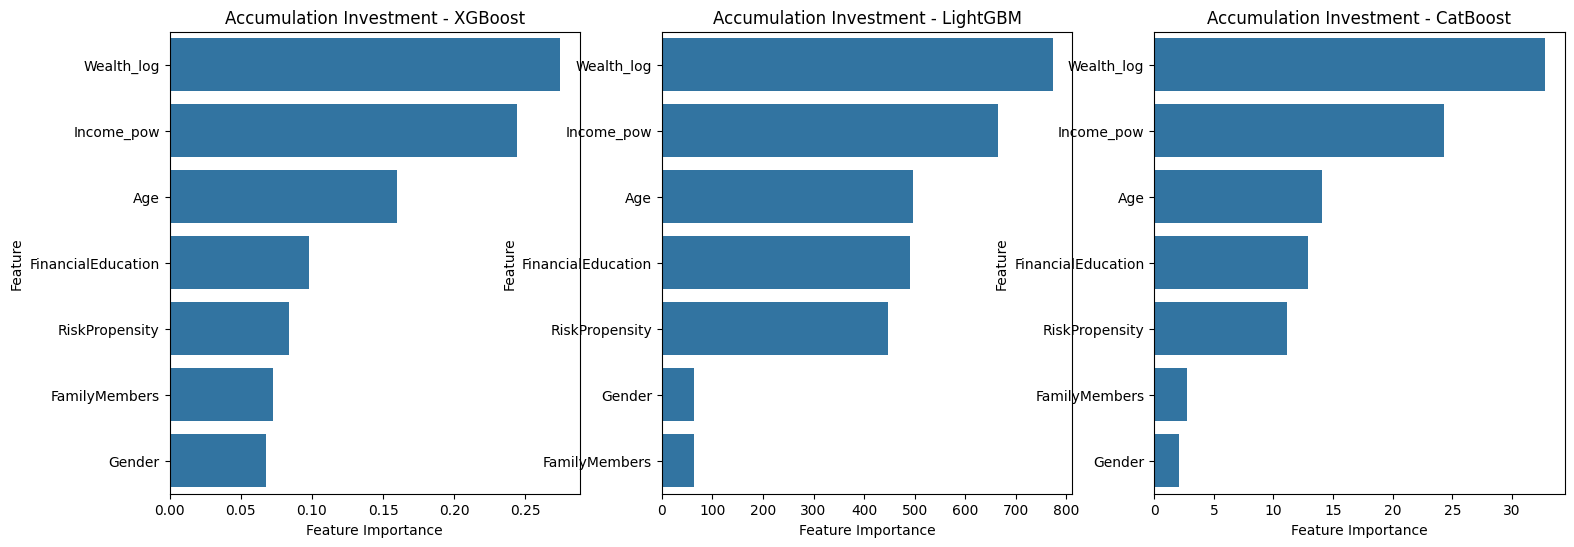

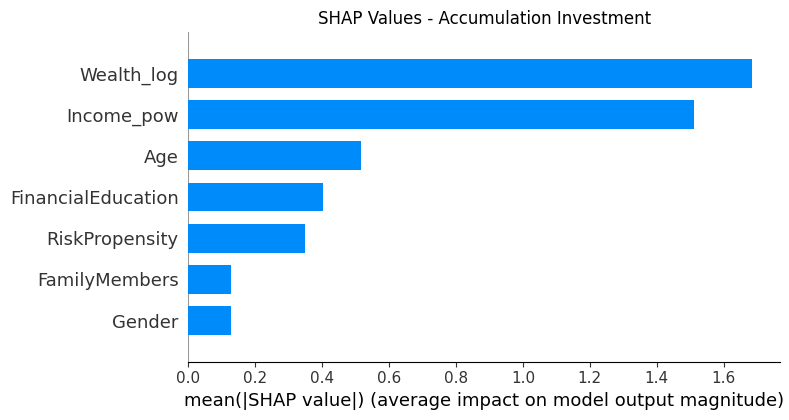

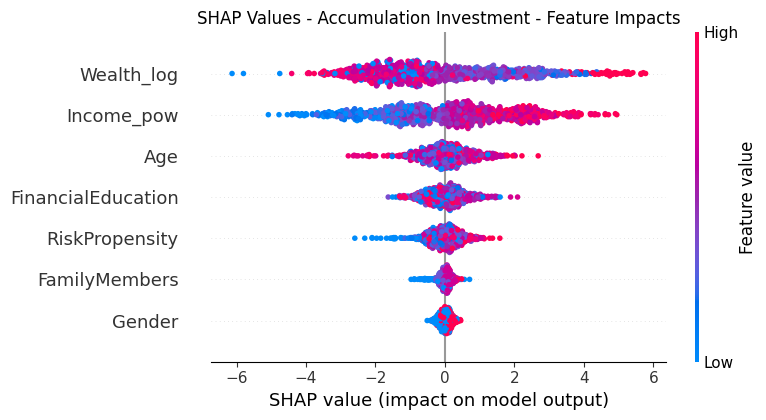

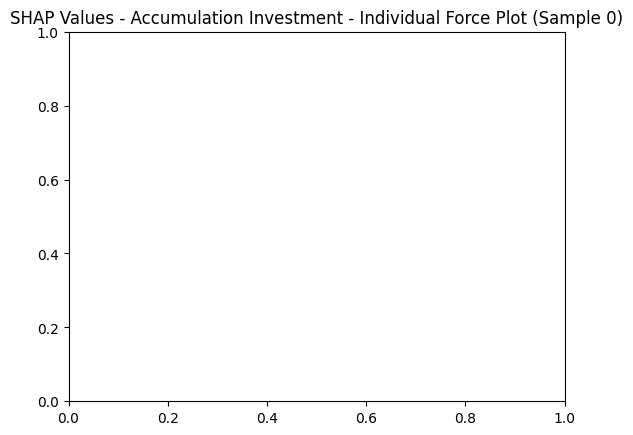

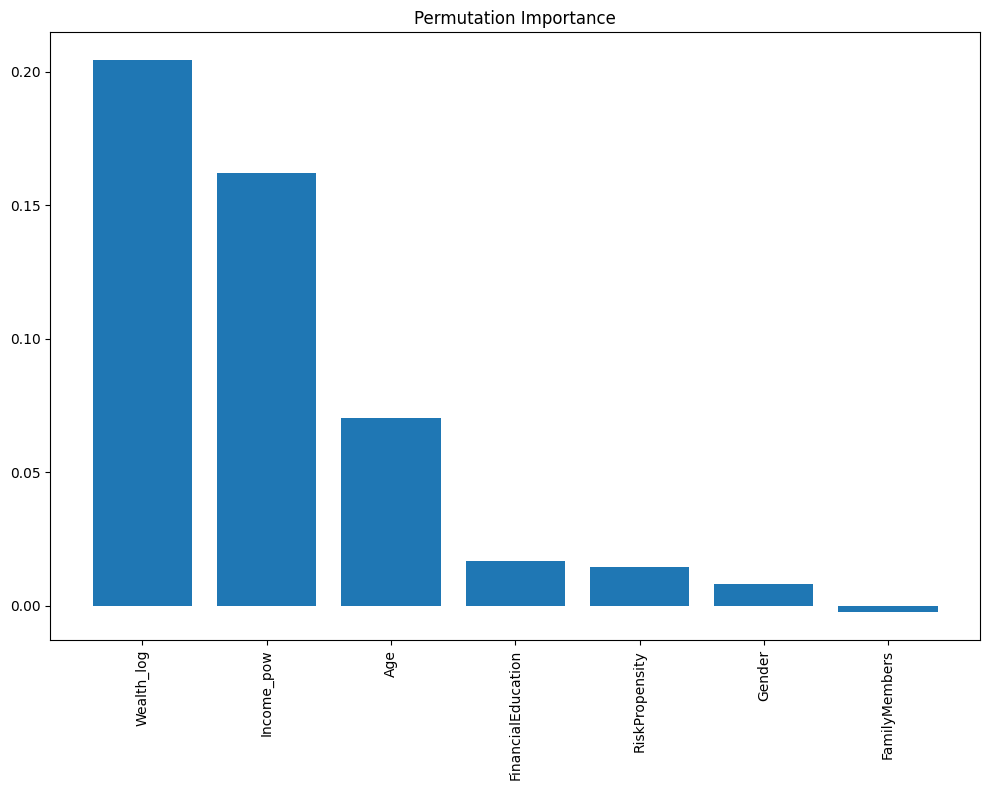

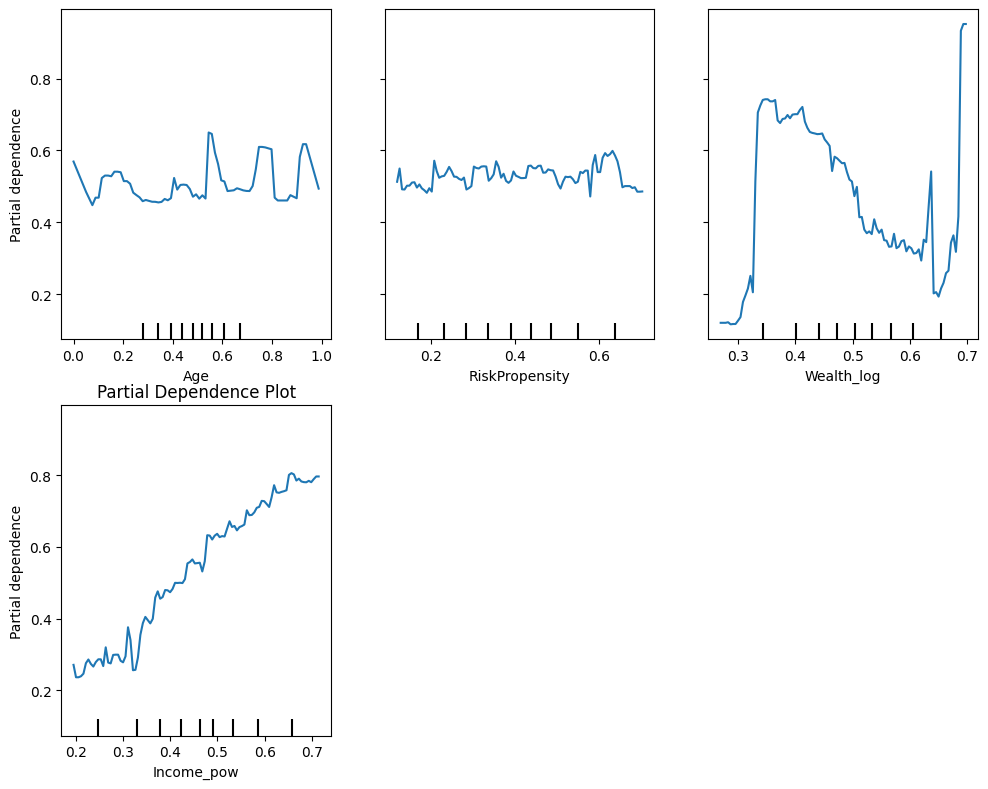

In [78]:
import matplotlib.pyplot as plt
import shap
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier


def plot_shap_values(model, X, title, sample_idx=0):
    """
    Generates SHAP visualizations for the given model and dataset X:
    - A bar plot of aggregated absolute SHAP values (global feature importance).
    - A summary (dot) plot showing the distribution of SHAP values per feature.
    - A force plot for local interpretability on an individual prediction.
    """
    # Create SHAP explainer and compute SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    # Global Feature Importance - Bar Plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    # Global Feature Impact - Summary Dot Plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X, show=False)
    plt.title(f"{title} - Feature Impacts")
    plt.tight_layout()
    plt.show()
    
    # Local Interpretability: Force Plot for a single prediction
    if hasattr(X, 'iloc'):
        sample = X.iloc[sample_idx, :]
    else:
        sample = X[sample_idx, :]
    
    # Generate and display the force plot (using matplotlib=True for non-notebook environments)
    force_plot = shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], sample)
    plt.title(f"{title} - Individual Force Plot (Sample {sample_idx})")
    plt.show()
    
    return explainer, shap_values

def plot_permutation_importance(model, X_test, y_test, scoring='accuracy'):
    """
    Computes and plots permutation importance for the given model.
    """
    result = permutation_importance(model, X_test, y_test, scoring=scoring, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()[::-1]
    plt.figure(figsize=(10, 8))

    feature_names = X_test.columns
    
    plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx])
    plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.title('Permutation Importance')
    plt.tight_layout()
    plt.show()

def plot_partial_dependence(model, X, features, target=None):
    """
    Generates a Partial Dependence Plot (PDP) for the specified features using the given model and dataset.
    
    Parameters:
    - model: Trained model.
    - X: DataFrame or array-like feature data.
    - features: List of feature indices or names to plot.
    - target: (Optional) For classifiers, specify the target class for which to compute the PDP.
    """
    # Validate that the provided features are in the data
    if isinstance(X, pd.DataFrame):
        available_features = list(X.columns)
        # If features are provided as indices, convert them to names
        if isinstance(features[0], int):
            features = [available_features[i] for i in features if i < len(available_features)]
    else:
        if isinstance(features[0], int):
            if max(features) >= X.shape[1]:
                raise ValueError(f"Feature index out of range. X has {X.shape[1]} features.")
    
    fig, ax = plt.subplots(figsize=(10, 8))
    PartialDependenceDisplay.from_estimator(model, X, features, target=target, ax=ax)
    plt.title('Partial Dependence Plot')
    plt.tight_layout()
    plt.show()

# -----------------------------
# Main Analysis Loop
# -----------------------------
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nFeature Importance for {target_name}")
    print("=" * 50)
    
    num_models = len(models)
    # Create subplots for traditional feature importance from each model
    fig, axes = plt.subplots(1, num_models, figsize=(num_models * 6, 6))
    if num_models == 1:
        axes = [axes]
    
    # Loop through models to train, evaluate, and plot feature importance
    for ax, (model_name, model) in zip(axes, models.items()):
        X_base_train, X_base_test, y_train, y_test = split_data(X_base, y)
        results = train_evaluate_model(X_base_train, y_train, X_base_test, y_test, model)
        plot_feature_importance_ax(
            results['model'],
            X_base.columns,
            f'{target_name} - {model_name}',
            ax
        )
    
    # Perform SHAP analysis using the last trained model in the loop
    explainer, shap_values = plot_shap_values(results['model'], X_base_test, f'SHAP Values - {target_name}', sample_idx=0)
    
    # Additional Interpretability Methods:
    # 1. Permutation Importance:
    plot_permutation_importance(results['model'], X_base_test, y_test, scoring='accuracy')
    
    # 2. Partial Dependence Plot (PDP) for selected features.
    #    For classifiers, specify the target class if needed (e.g., target=1 for the positive class).

    features_to_plot = ['Age', 'RiskPropensity', 'Wealth_log', 'Income_pow']

    try:
        plot_partial_dependence(results['model'], X_base_test, features=features_to_plot, target=1)
    except ValueError as e:
        print("Error plotting Partial Dependence Plot:", e)
    
    # Additional notes:
    # - For local explanations using LIME, refer to: https://lime-ml.readthedocs.io/en/latest/
    # - ICE (Individual Conditional Expectation) plots can be created using libraries like PDPbox: https://pdpbox.readthedocs.io/en/latest/
    # - Experiment with other models (e.g., RandomForestClassifier) and rank them based on a primary metric (e.g., Recall) and secondary criteria (e.g., Precision, training time).



In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Custom dataset class
class InvestmentDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.values)
        self.y = torch.FloatTensor(y.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# MLP architecture
class FlexibleMLP(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn=nn.ReLU, use_batchnorm=True, dropout_rate=0.0):
        super(FlexibleMLP, self).__init__()

        layers = []
        prev_size = input_size

        for layer_size in hidden_layers:
            layers.append(nn.Linear(prev_size, layer_size))

            if use_batchnorm:
                layers.append(nn.BatchNorm1d(layer_size))

            layers.append(activation_fn())

            if dropout_rate > 0.0:
                layers.append(nn.Dropout(dropout_rate))

            prev_size = layer_size

        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    for epoch in range(epochs):
        model.train()
        train_loss = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        val_preds = []
        val_true = []

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch).squeeze()
                val_loss += criterion(y_pred, y_batch).item()
                val_preds.extend(((y_pred > 0.5).int().numpy()))
                val_true.extend(y_batch.int().numpy())

        if (epoch + 1) % 10 == 0:
            acc = accuracy_score(val_true, val_preds)
            print(f"Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader):.4f}, "
                  f"Val Loss: {val_loss/len(val_loader):.4f}, Val Accuracy: {acc:.4f}")


# Use the same data split as before
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nTraining Neural Network for {target_name}")
    print("=" * 50)

    X_train, X_test, y_train, y_test = split_data(X_base, y)

    # Create data loaders
    train_dataset = InvestmentDataset(X_train, y_train)
    test_dataset = InvestmentDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model, criterion, optimizer
    model = MLP(input_size=X_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    


Training Neural Network for Income Investment

Training Neural Network for Accumulation Investment


In [80]:
# Modello 1: Simmetrico, profondo, largo
model1 = FlexibleMLP(
    input_size=X_train.shape[1],
    hidden_layers=[128, 64, 32, 64, 128],
    activation_fn=nn.ReLU,
    use_batchnorm=True,
    dropout_rate=0.2
)

In [81]:
# Modello 2: Forma "clessidra"
model2 = FlexibleMLP(
    input_size=X_train.shape[1],
    hidden_layers=[64, 32, 16, 32, 64],
    activation_fn=nn.LeakyReLU,
    use_batchnorm=True,
    dropout_rate=0.3
)

In [82]:
# Modello 3: Poco profondo ma molto largo
model3 = FlexibleMLP(
    input_size=X_train.shape[1],
    hidden_layers=[256, 128],
    activation_fn=nn.Tanh,
    use_batchnorm=False,
    dropout_rate=0.1
)

In [83]:
# Modello 4: Molto profondo, strati stretti
model4 = FlexibleMLP(
    input_size=X_train.shape[1],
    hidden_layers=[32, 32, 32, 32, 32, 32],
    activation_fn=nn.ELU,
    use_batchnorm=True,
    dropout_rate=0.2
)

In [103]:



def evaluate_nn_metrics(model, data_loader):
    model.eval()
    all_preds = []
    all_true = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            y_pred = model(X_batch).squeeze()
            all_preds.extend((y_pred > 0.5).float().numpy())
            all_true.extend(y_batch.numpy())

    return {
        'accuracy': accuracy_score(all_true, all_preds),
        'precision': precision_score(all_true, all_preds),
        'recall': recall_score(all_true, all_preds),
        'f1': f1_score(all_true, all_preds)
    }

# Model evaluation
model = model1  # cambia con model1, model3, model4 per provarli

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)
# Evaluate and display results
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nResults for {target_name}")
    print("=" * 50)

    X_train, X_test, y_train, y_test = split_data(X_base, y)

    # Create data loaders
    train_dataset = InvestmentDataset(X_train, y_train)
    test_dataset = InvestmentDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Get metrics
    train_metrics = evaluate_nn_metrics(model, train_loader)
    test_metrics = evaluate_nn_metrics(model, test_loader)

    # Display results
    metrics_df = pd.DataFrame({
        'Training': train_metrics,
        'Test': test_metrics
    }).round(3)
    if test_metrics['precision'] >= 0.8:
        print(f"\nModel: {model.__class__.__name__}")
        print("=" * 50)
        print(metrics_df)

Epoch 10, Train Loss: 0.5062, Val Loss: 0.5342, Val Accuracy: 0.7620
Epoch 20, Train Loss: 0.5012, Val Loss: 0.5218, Val Accuracy: 0.7710
Epoch 30, Train Loss: 0.4943, Val Loss: 0.5257, Val Accuracy: 0.7760
Epoch 40, Train Loss: 0.4912, Val Loss: 0.5237, Val Accuracy: 0.7740
Epoch 50, Train Loss: 0.4900, Val Loss: 0.5190, Val Accuracy: 0.7740
Epoch 60, Train Loss: 0.4858, Val Loss: 0.5236, Val Accuracy: 0.7690
Epoch 70, Train Loss: 0.4864, Val Loss: 0.5256, Val Accuracy: 0.7760
Epoch 80, Train Loss: 0.4717, Val Loss: 0.5303, Val Accuracy: 0.7710
Epoch 90, Train Loss: 0.4873, Val Loss: 0.5298, Val Accuracy: 0.7740
Epoch 100, Train Loss: 0.4821, Val Loss: 0.5288, Val Accuracy: 0.7760

Results for Income Investment

Model: FlexibleMLP
           Training   Test
accuracy      0.823  0.776
precision     0.872  0.833
recall        0.632  0.521
f1            0.733  0.641

Results for Accumulation Investment


In [104]:
# Model evaluation
model = model2  # cambia con model1, model3, model4 per provarli

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)
# Evaluate and display results
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nResults for {target_name}")
    print("=" * 50)

    X_train, X_test, y_train, y_test = split_data(X_base, y)

    # Create data loaders
    train_dataset = InvestmentDataset(X_train, y_train)
    test_dataset = InvestmentDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Get metrics
    train_metrics = evaluate_nn_metrics(model, train_loader)
    test_metrics = evaluate_nn_metrics(model, test_loader)

    # Display results
    metrics_df = pd.DataFrame({
        'Training': train_metrics,
        'Test': test_metrics
    }).round(3)

    if test_metrics['precision'] >= 0.8:
        print(f"\nModel: {model.__class__.__name__}")
        print("=" * 50)
        print(metrics_df)

Epoch 10, Train Loss: 0.5133, Val Loss: 0.4919, Val Accuracy: 0.7760
Epoch 20, Train Loss: 0.5184, Val Loss: 0.4738, Val Accuracy: 0.7870
Epoch 30, Train Loss: 0.5187, Val Loss: 0.4817, Val Accuracy: 0.7940
Epoch 40, Train Loss: 0.5206, Val Loss: 0.4888, Val Accuracy: 0.7740
Epoch 50, Train Loss: 0.5003, Val Loss: 0.4685, Val Accuracy: 0.7830
Epoch 60, Train Loss: 0.5255, Val Loss: 0.4854, Val Accuracy: 0.7850
Epoch 70, Train Loss: 0.5074, Val Loss: 0.4846, Val Accuracy: 0.7930
Epoch 80, Train Loss: 0.5163, Val Loss: 0.4738, Val Accuracy: 0.7900
Epoch 90, Train Loss: 0.5192, Val Loss: 0.4814, Val Accuracy: 0.7760
Epoch 100, Train Loss: 0.5135, Val Loss: 0.4790, Val Accuracy: 0.7840

Results for Income Investment

Results for Accumulation Investment

Model: FlexibleMLP
           Training   Test
accuracy      0.820  0.784
precision     0.924  0.863
recall        0.707  0.688
f1            0.801  0.766


In [105]:
# Model evaluation
model = model3  # cambia con model1, model3, model4 per provarli

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)
# Evaluate and display results
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nResults for {target_name}")
    print("=" * 50)

    X_train, X_test, y_train, y_test = split_data(X_base, y)

    # Create data loaders
    train_dataset = InvestmentDataset(X_train, y_train)
    test_dataset = InvestmentDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Get metrics
    train_metrics = evaluate_nn_metrics(model, train_loader)
    test_metrics = evaluate_nn_metrics(model, test_loader)

    # Display results
    metrics_df = pd.DataFrame({
        'Training': train_metrics,
        'Test': test_metrics
    }).round(3)

    if test_metrics['precision'] >= 0.8:
        print(f"\nModel: {model.__class__.__name__}")
        print("=" * 50)
        print(metrics_df)

Epoch 10, Train Loss: 0.4575, Val Loss: 0.4908, Val Accuracy: 0.7660
Epoch 20, Train Loss: 0.4559, Val Loss: 0.4899, Val Accuracy: 0.7680
Epoch 30, Train Loss: 0.4684, Val Loss: 0.4886, Val Accuracy: 0.7710
Epoch 40, Train Loss: 0.4492, Val Loss: 0.4836, Val Accuracy: 0.7670
Epoch 50, Train Loss: 0.4497, Val Loss: 0.4896, Val Accuracy: 0.7710
Epoch 60, Train Loss: 0.4494, Val Loss: 0.5056, Val Accuracy: 0.7580
Epoch 70, Train Loss: 0.4408, Val Loss: 0.4913, Val Accuracy: 0.7630
Epoch 80, Train Loss: 0.4442, Val Loss: 0.4819, Val Accuracy: 0.7720
Epoch 90, Train Loss: 0.4438, Val Loss: 0.4990, Val Accuracy: 0.7640
Epoch 100, Train Loss: 0.4354, Val Loss: 0.4853, Val Accuracy: 0.7760

Results for Income Investment

Results for Accumulation Investment

Model: FlexibleMLP
           Training   Test
accuracy      0.820  0.776
precision     0.877  0.815
recall        0.754  0.729
f1            0.811  0.770


In [106]:
# Model evaluation
model = model4  # cambia con model1, model3, model4 per provarli

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)
# Evaluate and display results
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nResults for {target_name}")
    print("=" * 50)

    X_train, X_test, y_train, y_test = split_data(X_base, y)

    # Create data loaders
    train_dataset = InvestmentDataset(X_train, y_train)
    test_dataset = InvestmentDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Get metrics
    train_metrics = evaluate_nn_metrics(model, train_loader)
    test_metrics = evaluate_nn_metrics(model, test_loader)

    # Display results
    metrics_df = pd.DataFrame({
        'Training': train_metrics,
        'Test': test_metrics
    }).round(3)

    if test_metrics['precision'] >= 0.8:
        print(f"\nModel: {model.__class__.__name__}")
        print("=" * 50)
        print(metrics_df)

Epoch 10, Train Loss: 0.5160, Val Loss: 0.4863, Val Accuracy: 0.7660
Epoch 20, Train Loss: 0.5160, Val Loss: 0.4997, Val Accuracy: 0.7670
Epoch 30, Train Loss: 0.5196, Val Loss: 0.4827, Val Accuracy: 0.7740
Epoch 40, Train Loss: 0.5159, Val Loss: 0.4811, Val Accuracy: 0.7750
Epoch 50, Train Loss: 0.5197, Val Loss: 0.4864, Val Accuracy: 0.7670
Epoch 60, Train Loss: 0.5216, Val Loss: 0.4898, Val Accuracy: 0.7770
Epoch 70, Train Loss: 0.5134, Val Loss: 0.4801, Val Accuracy: 0.7640
Epoch 80, Train Loss: 0.5149, Val Loss: 0.4721, Val Accuracy: 0.7780
Epoch 90, Train Loss: 0.5139, Val Loss: 0.4809, Val Accuracy: 0.7810
Epoch 100, Train Loss: 0.5133, Val Loss: 0.4753, Val Accuracy: 0.7810

Results for Income Investment

Results for Accumulation Investment

Model: FlexibleMLP
           Training   Test
accuracy      0.806  0.781
precision     0.883  0.828
recall        0.717  0.723
f1            0.792  0.772


In [88]:
# Enhanced MLP class
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)


# Training with learning rate scheduler
def train_model_with_curves(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0
        val_preds = []
        val_true = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch).squeeze()
                val_loss += criterion(y_pred, y_batch).item()
                val_preds.extend((y_pred > 0.5).float().numpy())
                val_true.extend(y_batch.numpy())

        # Store metrics
        train_losses.append(train_loss/len(train_loader))
        val_losses.append(val_loss/len(val_loader))
        val_accuracies.append(accuracy_score(val_true, val_preds))

        scheduler.step(val_loss)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, '
                  f'Val Loss: {val_losses[-1]:.4f}, '
                  f'Val Accuracy: {val_accuracies[-1]:.4f}')

    # Plot learning curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model


Training Neural Network for Income Investment
Epoch 10, Train Loss: 0.5240, Val Loss: 0.5386, Val Accuracy: 0.7590
Epoch 20, Train Loss: 0.5202, Val Loss: 0.5360, Val Accuracy: 0.7640
Epoch 30, Train Loss: 0.5098, Val Loss: 0.5292, Val Accuracy: 0.7640
Epoch 40, Train Loss: 0.5072, Val Loss: 0.5304, Val Accuracy: 0.7630
Epoch 50, Train Loss: 0.5134, Val Loss: 0.5323, Val Accuracy: 0.7590
Epoch 60, Train Loss: 0.5056, Val Loss: 0.5284, Val Accuracy: 0.7660
Epoch 70, Train Loss: 0.4992, Val Loss: 0.5297, Val Accuracy: 0.7580
Epoch 80, Train Loss: 0.4942, Val Loss: 0.5297, Val Accuracy: 0.7660
Epoch 90, Train Loss: 0.4986, Val Loss: 0.5284, Val Accuracy: 0.7640
Epoch 100, Train Loss: 0.5002, Val Loss: 0.5297, Val Accuracy: 0.7650


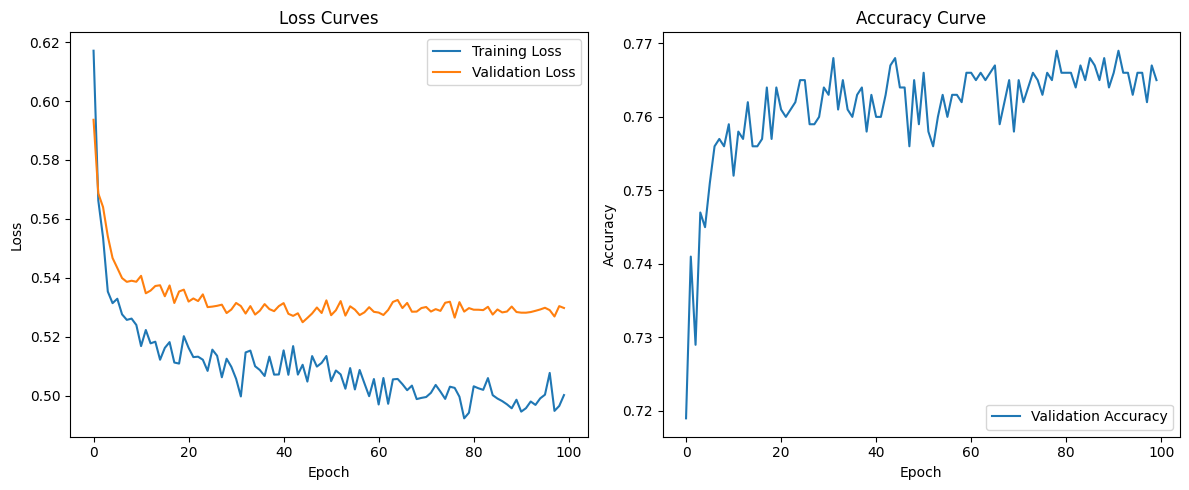


Results for Income Investment

Neural Network Metrics:
           Training   Test
accuracy      0.808  0.765
precision     0.836  0.788
recall        0.620  0.531
f1            0.712  0.635

Training Neural Network for Accumulation Investment
Epoch 10, Train Loss: 0.5835, Val Loss: 0.5577, Val Accuracy: 0.7280
Epoch 20, Train Loss: 0.5309, Val Loss: 0.5066, Val Accuracy: 0.7540
Epoch 30, Train Loss: 0.5239, Val Loss: 0.4940, Val Accuracy: 0.7690
Epoch 40, Train Loss: 0.5155, Val Loss: 0.4807, Val Accuracy: 0.7670
Epoch 50, Train Loss: 0.5184, Val Loss: 0.4854, Val Accuracy: 0.7760
Epoch 60, Train Loss: 0.5142, Val Loss: 0.4838, Val Accuracy: 0.7860
Epoch 70, Train Loss: 0.5070, Val Loss: 0.4759, Val Accuracy: 0.7740
Epoch 80, Train Loss: 0.5095, Val Loss: 0.4797, Val Accuracy: 0.7840
Epoch 90, Train Loss: 0.5157, Val Loss: 0.4707, Val Accuracy: 0.7750
Epoch 100, Train Loss: 0.4963, Val Loss: 0.4746, Val Accuracy: 0.7800


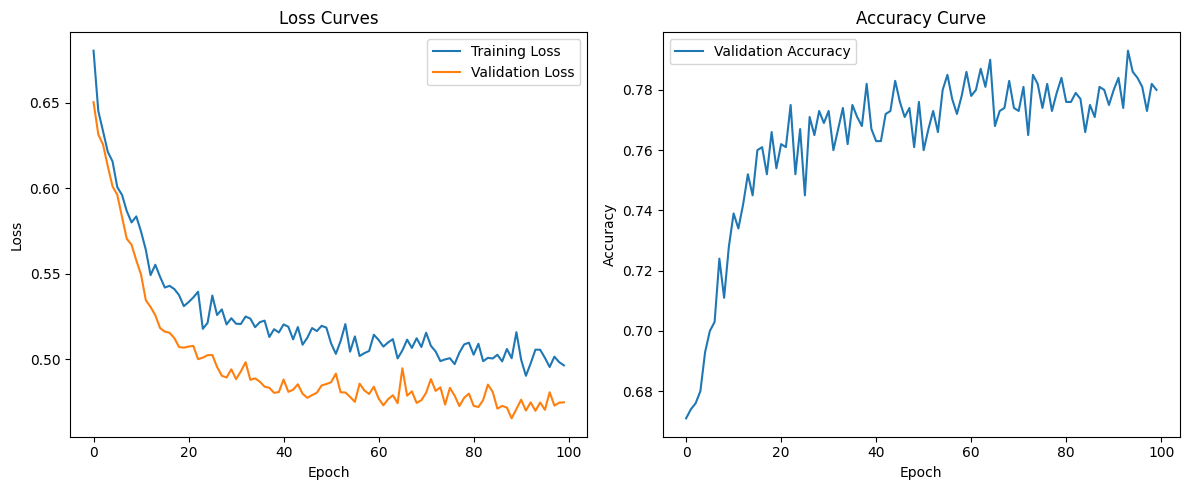


Results for Accumulation Investment

Neural Network Metrics:
           Training   Test
accuracy      0.818  0.780
precision     0.905  0.850
recall        0.721  0.694
f1            0.803  0.764


In [89]:
# Training and evaluation for both targets
for target_name, y in [('Income Investment', y_income), ('Accumulation Investment', y_accum)]:
    print(f"\nTraining Neural Network for {target_name}")
    print("=" * 50)

    X_train, X_test, y_train, y_test = split_data(X_base, y)

    # Create data loaders
    train_dataset = InvestmentDataset(X_train, y_train)
    test_dataset = InvestmentDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model, criterion, optimizer
    model = MLP(input_size=X_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_model_with_curves(model, train_loader, test_loader, criterion, optimizer)

    # Display final metrics
    print(f"\nResults for {target_name}")
    print("=" * 50)

    train_metrics = evaluate_nn_metrics(model, train_loader)
    test_metrics = evaluate_nn_metrics(model, test_loader)

    metrics_df = pd.DataFrame({
        'Training': train_metrics,
        'Test': test_metrics
    }).round(3)

    print("\nNeural Network Metrics:")
    print(metrics_df)


Training the enhanced MLP model (Accumulation Investment)
Epoch 10, Train Loss: 0.4328, Val Loss: 0.4858, Val Accuracy: 0.7810
Epoch 20, Train Loss: 0.4252, Val Loss: 0.4819, Val Accuracy: 0.7700
Epoch 30, Train Loss: 0.4250, Val Loss: 0.4893, Val Accuracy: 0.7750
Epoch 40, Train Loss: 0.4186, Val Loss: 0.4864, Val Accuracy: 0.7800
Epoch 50, Train Loss: 0.4182, Val Loss: 0.4857, Val Accuracy: 0.7700
Epoch 60, Train Loss: 0.4178, Val Loss: 0.4853, Val Accuracy: 0.7740
Epoch 70, Train Loss: 0.4194, Val Loss: 0.4863, Val Accuracy: 0.7780
Epoch 80, Train Loss: 0.4156, Val Loss: 0.4857, Val Accuracy: 0.7760
Epoch 90, Train Loss: 0.4200, Val Loss: 0.4860, Val Accuracy: 0.7780
Epoch 100, Train Loss: 0.4175, Val Loss: 0.4860, Val Accuracy: 0.7750


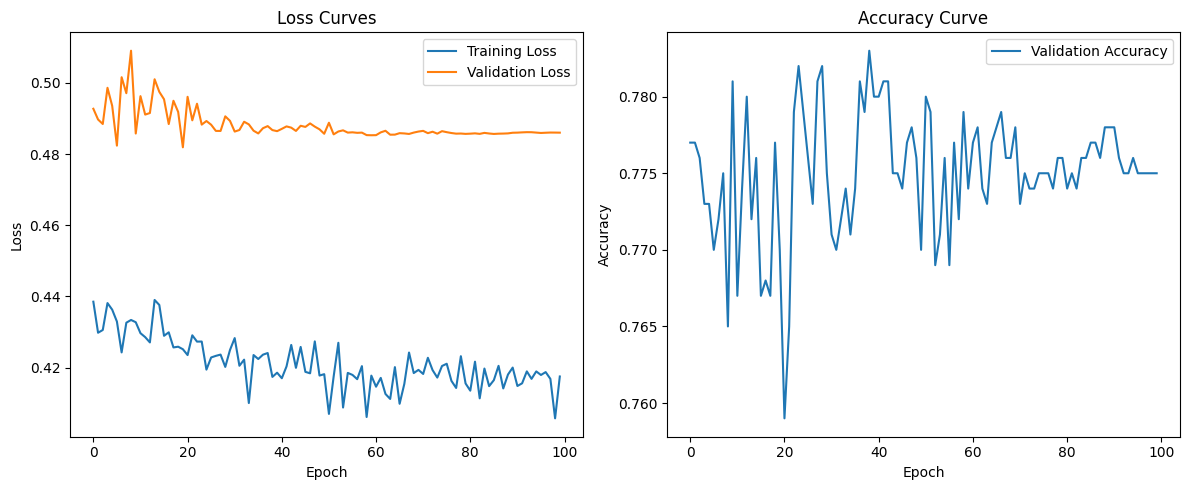

In [107]:
# Let's modify the Investment Dataset class to handle both Pandas and PyTorch
class InvestmentDatasetFixed(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.values)
        # Check if y is already a tensor or needs to be converted
        if isinstance(y, torch.Tensor):
            self.y = y
        else:
            self.y = torch.FloatTensor(y.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Function to get predictions from the enhanced MLP model (i.e., the last estimated one)
def get_predictions_from_mlp(model, X_test):
    # Create a dataset and dataloader for predictions
    dummy_y = pd.Series(np.zeros(len(X_test)))  # Creating a Panda series
    test_dataset = InvestmentDatasetFixed(X_test, dummy_y)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Get predictions
    model.eval()
    all_preds = []

    with torch.no_grad():
        for X_batch, _ in test_loader:
            y_pred = model(X_batch).squeeze()
            all_preds.extend((y_pred > 0.5).float().numpy())

    return np.array(all_preds)

# Filtering accumulation products from our product database
accumulation_products = products_df[products_df['Type'] == 1].copy()
min_risk = accumulation_products['Risk'].min() # Will be used for risk matching later

# # Training the enhanced MLP model for accumulation investment needs prediction
print("\nTraining the enhanced MLP model (Accumulation Investment)")
print("=" * 80)

# Data preparation
X_base, X_engineered = prepare_features(transformed_df)
y_accum = needs_df['AccumulationInvestment']
X_train, X_test, y_train, y_test = split_data(X_base, y_accum)

# Create data loaders using our improved Dataset class
train_dataset = InvestmentDatasetFixed(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = InvestmentDatasetFixed(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)

# Initialize and train the model with learning curves visualization
model = model3
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = train_model_with_curves(model, train_loader, test_loader, criterion, optimizer)

# Use the trained model to predict accumulation investment needs for the test set clients
y_pred = get_predictions_from_mlp(model, X_test)

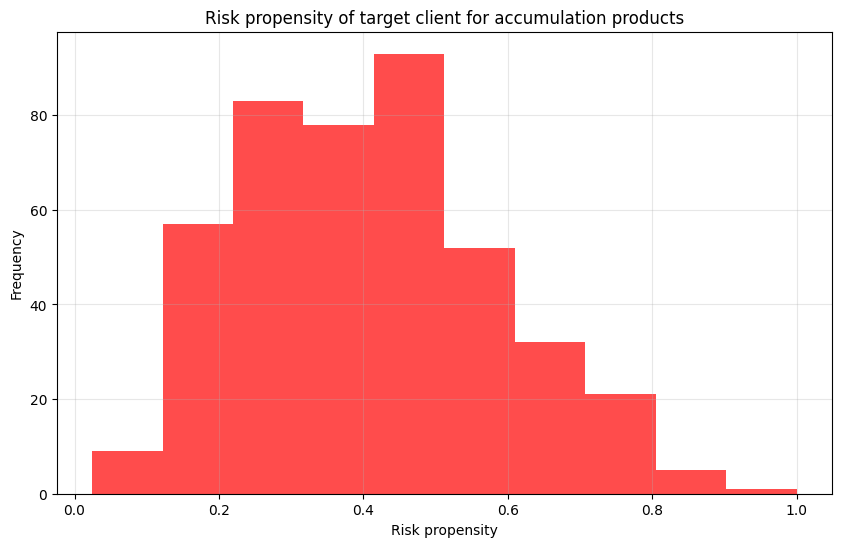


Top 10 personalized recommendations:
   ClientID  RecommendedProductID  ClientRiskPropensity  ProductRiskLevel
0       741                     6              0.363757              0.36
1      4159                     9              0.351479              0.27
2      2352                     1              0.632490              0.55
3      3373                     0              0.185120              0.00
4      1177                     9              0.326280              0.27
5      1281                     0              0.185263              0.00
6      1506                     8              0.504660              0.48
7      1243                     0              0.231562              0.00
8      1552                     0              0.247239              0.00
9      1071                     9              0.299449              0.27


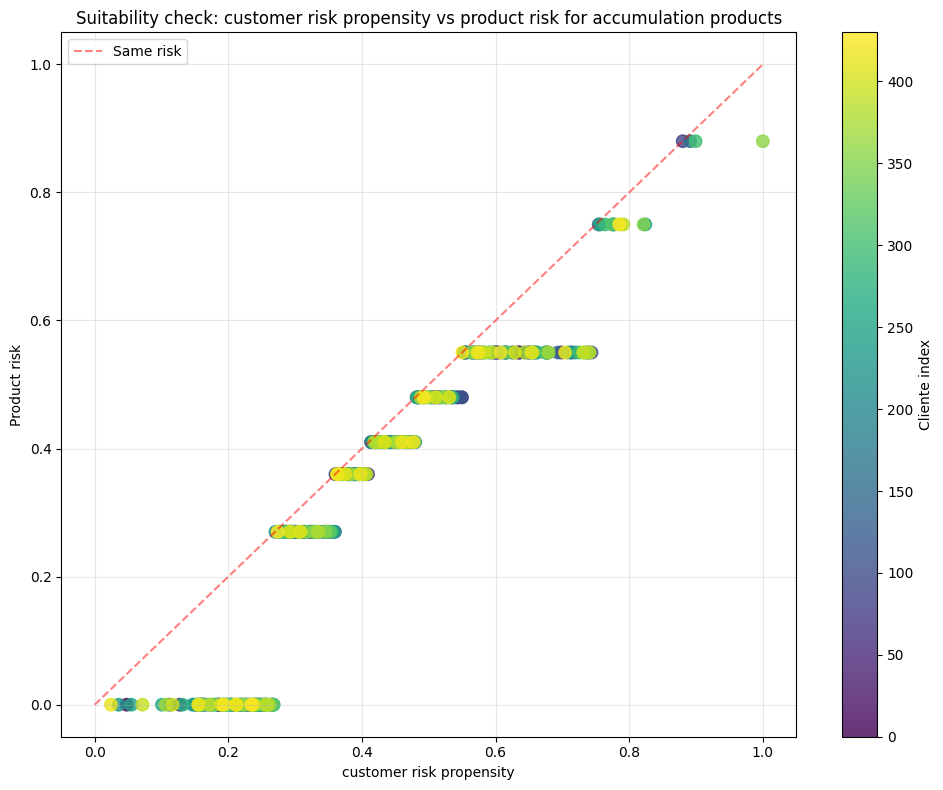

In [91]:
# Collecting client IDs and their risk propensities from the test set
# We filter for clients predicted to need accumulation products (y_pred == 1)
client_indices = np.where(y_pred == 1)[0]
target_client_ids = needs_df.iloc[X_test.index[client_indices]].index.values
target_client_risk_propensity = X_test.iloc[client_indices]['RiskPropensity'].values

# Visualizing the risk propensity distribution of target clients
plt.figure(figsize=(10, 6))
plt.hist(target_client_risk_propensity, color='r', bins=10, alpha=0.7)
plt.title('Risk propensity of target client for accumulation products')
plt.xlabel('Risk propensity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

# Initialize lists to store recommendation results
nba_id_product = []
recommended_risk_level = []

# Extract product information for matching
product_ids = accumulation_products['IDProduct'].astype(np.uint16).values
product_risks = accumulation_products['Risk'].values

# Generate personalized recommendations for each target client
for i in range(len(target_client_risk_propensity)):
    client_risk = target_client_risk_propensity[i]

    if client_risk > min_risk:
        # Find products with acceptable risk (< customer's appetite)
        suitable_products = product_risks[product_risks < client_risk]

        if len(suitable_products) > 0:
            # Find the product with the highest risk among suitable ones
            # This maximizes potential returns while respecting risk tolerance
            max_suitable_risk = max(suitable_products)
            recommended_product_id = product_ids[product_risks == max_suitable_risk][0]
            nba_id_product.append(recommended_product_id)
            recommended_risk_level.append(max_suitable_risk)
        else:
            # No suitable products
            nba_id_product.append(0)
            recommended_risk_level.append(0)
    else:
        #  Client's risk propensity too low for any available product
        nba_id_product.append(0)
        recommended_risk_level.append(0)

# Create a comprehensive recommendation matrix
nba = pd.DataFrame({
    'ClientID': target_client_ids,
    'RecommendedProductID': nba_id_product,
    'ClientRiskPropensity': target_client_risk_propensity,
    'ProductRiskLevel': recommended_risk_level
})

# Display sample recommendations
print("\nTop 10 personalized recommendations:")
print(nba.head(10))

# Suitability Chart: customer risk propensity vs product risk
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    nba['ClientRiskPropensity'],
    nba['ProductRiskLevel'],
    c=range(len(nba)),
    cmap='viridis',
    alpha=0.8,
    s=80
)
plt.colorbar(scatter, label='Cliente index')
plt.title('Suitability check: customer risk propensity vs product risk for accumulation products')
plt.xlabel('customer risk propensity')
plt.ylabel('Product risk')
plt.grid(alpha=0.3)

# Add reference line for perfect risk matching
max_val = max(nba['ClientRiskPropensity'].max(), nba['ProductRiskLevel'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Same risk')
plt.legend()
plt.tight_layout()
plt.show()


Recommendation statistics:
Total customers analyzed: 431
Customers with valid recommendations: 321 (74.48%)
Customers without suitable recommendations: 110


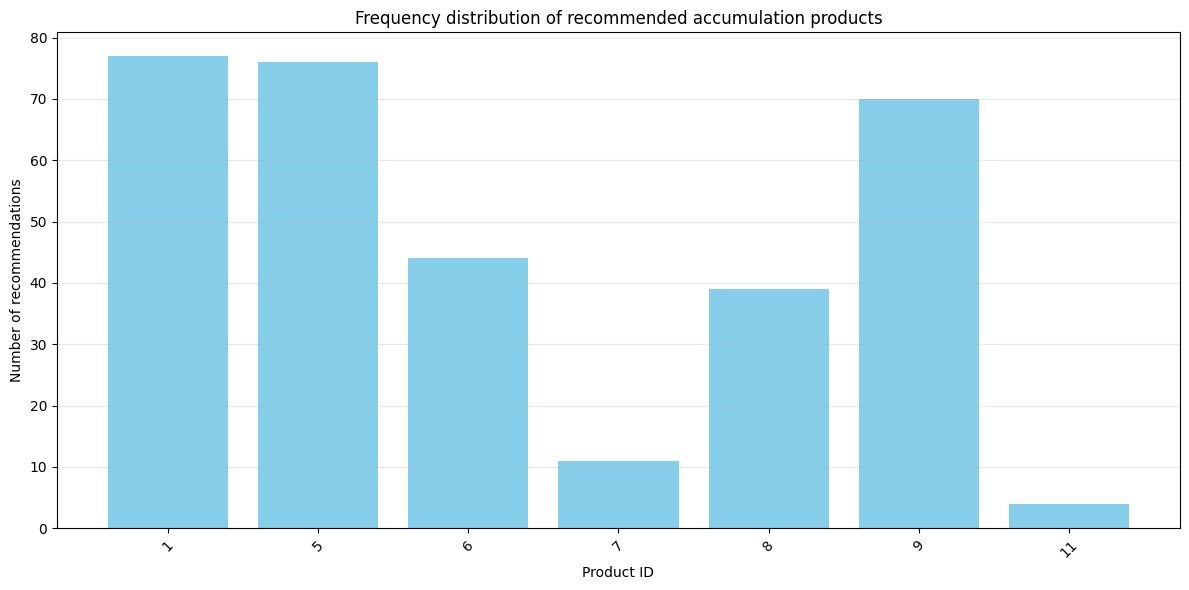


Details on the most recommended accumulation products:

Product ID: 1
Risk: 0.55
Recommended to 77 clients

Product ID: 5
Risk: 0.41
Recommended to 76 clients

Product ID: 9
Risk: 0.27
Recommended to 70 clients


In [92]:
# Analysis of recommendations
total_clients = len(nba)
clients_with_recommendations = len(nba[nba['RecommendedProductID'] > 0])
percentage_with_recommendations = (clients_with_recommendations / total_clients) * 100

print(f"\nRecommendation statistics:")
print(f"Total customers analyzed: {total_clients}")
print(f"Customers with valid recommendations: {clients_with_recommendations} ({percentage_with_recommendations:.2f}%)")
print(f"Customers without suitable recommendations: {total_clients - clients_with_recommendations}")

# Frequency distribution of recommended products
if clients_with_recommendations > 0:
    plt.figure(figsize=(12, 6))

    # Recommended products
    recommendation_counts = nba['RecommendedProductID'].value_counts().sort_index()
    recommendation_counts = recommendation_counts[recommendation_counts.index > 0]  # Escludi ID 0

    plt.bar(recommendation_counts.index.astype(str), recommendation_counts.values, color='skyblue')
    plt.title('Frequency distribution of recommended accumulation products')
    plt.xlabel('Product ID')
    plt.ylabel('Number of recommendations')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Details on the most recommended products
    if len(recommendation_counts) > 0:
        top_products = recommendation_counts.nlargest(3).index
        print("\nDetails on the most recommended accumulation products:")
        for prod_id in top_products:
            product_details = accumulation_products[accumulation_products['IDProduct'] == prod_id]
            print(f"\nProduct ID: {prod_id}")
            print(f"Risk: {product_details['Risk'].values[0]}")
            print(f"Recommended to {recommendation_counts[prod_id]} clients")
else:
    print("\nNo products were recommended to the analyzed customers")

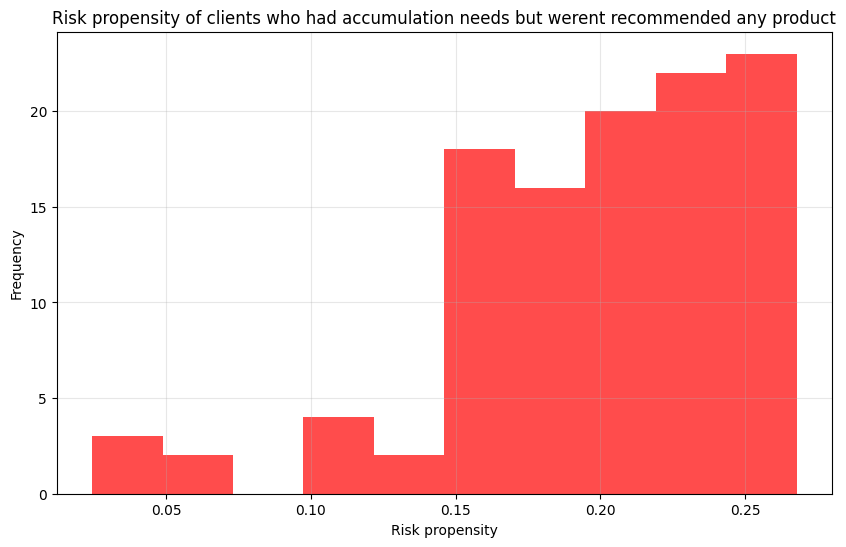

In [93]:
#Analysis of absence of recomendations
#CONCLUSION: the absence of recomendations is due to extremely low risk propensity
clients_without_recommendations_risk = nba[~(nba["RecommendedProductID"] > 0)]["ClientRiskPropensity"].values
plt.figure(figsize=(10, 6))
plt.hist(clients_without_recommendations_risk, color='r', bins=10, alpha=0.7)
plt.title('Risk propensity of clients who had accumulation needs but werent recommended any product')
plt.xlabel('Risk propensity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()



Training the enhanced MLP model (Income Investment)
Epoch 10, Train Loss: 0.5226, Val Loss: 0.5421, Val Accuracy: 0.7560
Epoch 20, Train Loss: 0.5156, Val Loss: 0.5379, Val Accuracy: 0.7540
Epoch 30, Train Loss: 0.5107, Val Loss: 0.5329, Val Accuracy: 0.7550
Epoch 40, Train Loss: 0.4963, Val Loss: 0.5312, Val Accuracy: 0.7610
Epoch 50, Train Loss: 0.5096, Val Loss: 0.5287, Val Accuracy: 0.7610
Epoch 60, Train Loss: 0.5034, Val Loss: 0.5332, Val Accuracy: 0.7600
Epoch 70, Train Loss: 0.4994, Val Loss: 0.5293, Val Accuracy: 0.7660
Epoch 80, Train Loss: 0.5027, Val Loss: 0.5280, Val Accuracy: 0.7680
Epoch 90, Train Loss: 0.4995, Val Loss: 0.5263, Val Accuracy: 0.7600
Epoch 100, Train Loss: 0.5016, Val Loss: 0.5290, Val Accuracy: 0.7620


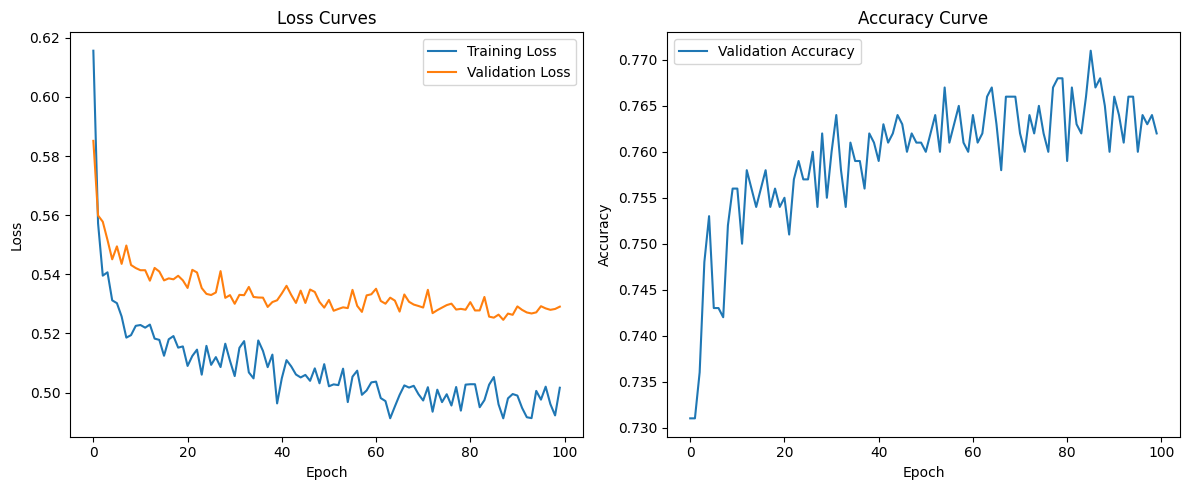

In [94]:
#Now we want to get recomendations for clients with IncomeInvestment needs

# Filtering accumulation products from our product database
income_products = products_df[products_df['Type'] == 0].copy()
min_risk = income_products['Risk'].min() # Will be used for risk matching later

# # Training the enhanced MLP model for accumulation investment needs prediction
print("\nTraining the enhanced MLP model (Income Investment)")
print("=" * 80)

# Data preparation
X_base, X_engineered = prepare_features(transformed_df)
y_accum = needs_df['IncomeInvestment']
X_train, X_test, y_train, y_test = split_data(X_base, y_accum)

# Create data loaders using our improved Dataset class
train_dataset = InvestmentDatasetFixed(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = InvestmentDatasetFixed(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)

# Initialize and train the model with learning curves visualization
model = MLP(input_size=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = train_model_with_curves(model, train_loader, test_loader, criterion, optimizer)

# Use the trained model to predict accumulation investment needs for the test set clients
y_pred = get_predictions_from_mlp(model, X_test)

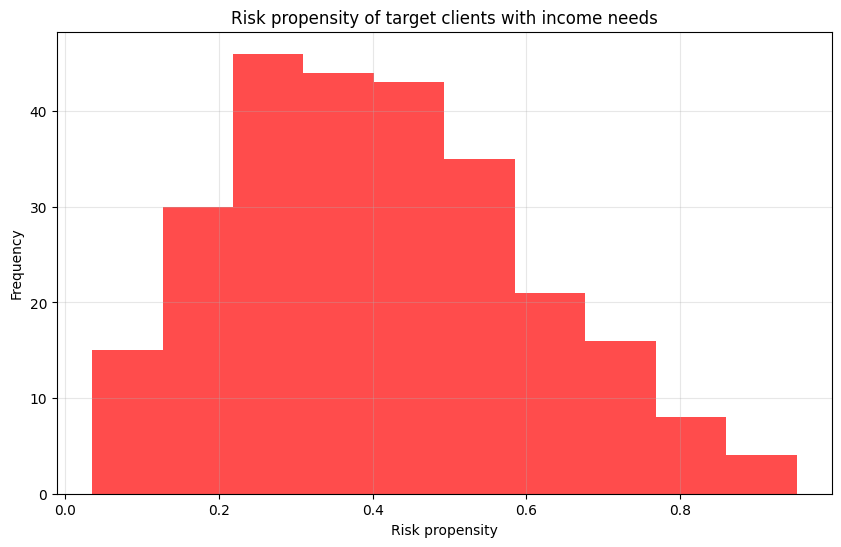


Top 10 personalized income recommendations:
   ClientID  RecommendedProductID  ClientRiskPropensity  ProductRiskLevel
0      2667                     2              0.304081              0.30
1      1038                     2              0.396747              0.30
2      2982                     4              0.447390              0.44
3      1020                    10              0.287398              0.13
4      4816                     4              0.650618              0.44
5      4439                     2              0.438114              0.30
6      2014                     4              0.467677              0.44
7      1086                     4              0.516014              0.44
8      2129                    10              0.147114              0.13
9      3199                     0              0.047967              0.00


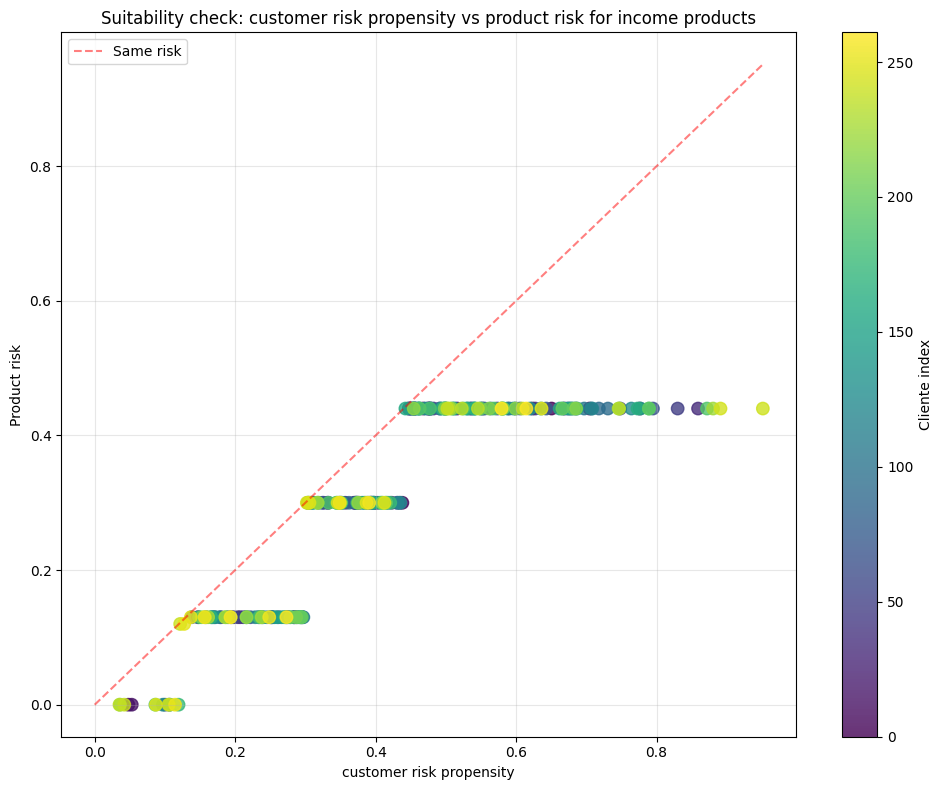

In [95]:
# Collecting client IDs and their risk propensities from the test set
# We filter for clients predicted to need accumulation products (y_pred == 1)
client_indices = np.where(y_pred == 1)[0]
target_client_ids = needs_df.iloc[X_test.index[client_indices]].index.values
target_client_risk_propensity = X_test.iloc[client_indices]['RiskPropensity'].values

# Visualizing the risk propensity distribution of target clients
plt.figure(figsize=(10, 6))
plt.hist(target_client_risk_propensity, color='r', bins=10, alpha=0.7)
plt.title('Risk propensity of target clients with income needs')
plt.xlabel('Risk propensity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

# Initialize lists to store recommendation results
nba_id_product = []
recommended_risk_level = []

# Extract product information for matching
product_ids = income_products['IDProduct'].astype(np.uint16).values
product_risks = income_products['Risk'].values

# Generate personalized recommendations for each target client
for i in range(len(target_client_risk_propensity)):
    client_risk = target_client_risk_propensity[i]

    if client_risk > min_risk:
        # Find products with acceptable risk (< customer's appetite)
        suitable_products = product_risks[product_risks < client_risk]

        if len(suitable_products) > 0:
            # Find the product with the highest risk among suitable ones
            # This maximizes potential returns while respecting risk tolerance
            max_suitable_risk = max(suitable_products)
            recommended_product_id = product_ids[product_risks == max_suitable_risk][0]
            nba_id_product.append(recommended_product_id)
            recommended_risk_level.append(max_suitable_risk)
        else:
            # No suitable products
            nba_id_product.append(0)
            recommended_risk_level.append(0)
    else:
        #  Client's risk propensity too low for any available product
        nba_id_product.append(0)
        recommended_risk_level.append(0)

# Create a comprehensive recommendation matrix
nba = pd.DataFrame({
    'ClientID': target_client_ids,
    'RecommendedProductID': nba_id_product,
    'ClientRiskPropensity': target_client_risk_propensity,
    'ProductRiskLevel': recommended_risk_level
})

# Display sample recommendations
print("\nTop 10 personalized income recommendations:")
print(nba.head(10))

# Suitability Chart: customer risk propensity vs product risk
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    nba['ClientRiskPropensity'],
    nba['ProductRiskLevel'],
    c=range(len(nba)),
    cmap='viridis',
    alpha=0.8,
    s=80
)
plt.colorbar(scatter, label='Cliente index')
plt.title('Suitability check: customer risk propensity vs product risk for income products')
plt.xlabel('customer risk propensity')
plt.ylabel('Product risk')
plt.grid(alpha=0.3)

# Add reference line for perfect risk matching
max_val = max(nba['ClientRiskPropensity'].max(), nba['ProductRiskLevel'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Same risk')
plt.legend()
plt.tight_layout()
plt.show()


Recommendation statistics:
Total customers analyzed: 262
Customers with valid recommendations: 248 (94.66%)
Customers without suitable recommendations: 14


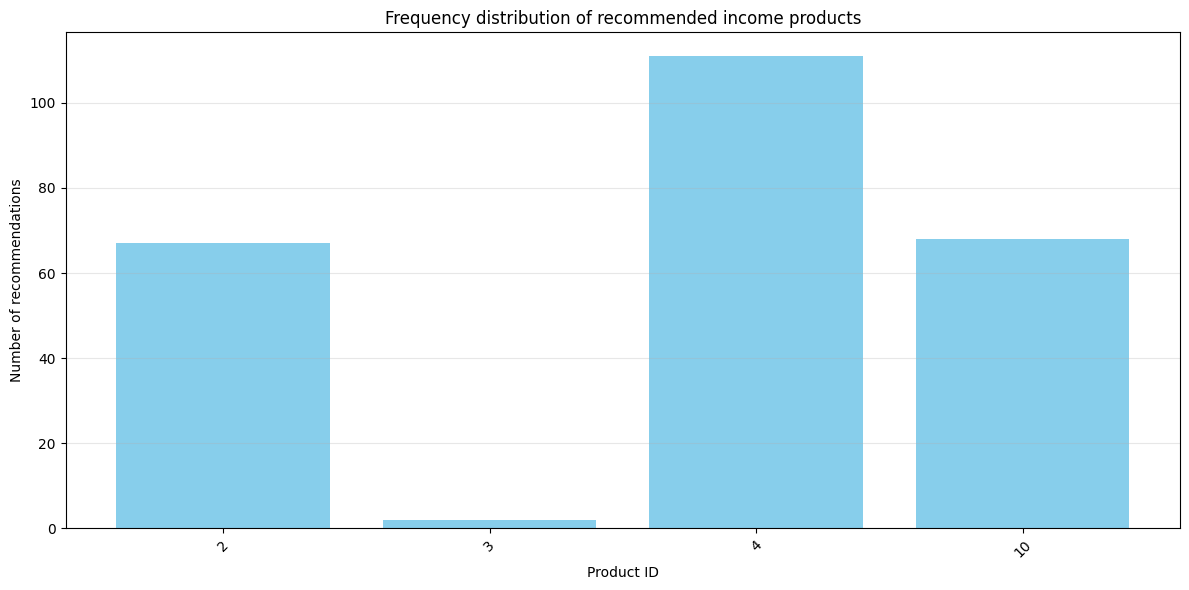


Details on the most recommended income products:

Product ID: 4
Risk: []
Recommended to 111 clients

Product ID: 10
Risk: []
Recommended to 68 clients

Product ID: 2
Risk: []
Recommended to 67 clients


In [96]:
# Analysis of recommendations
total_clients = len(nba)
clients_with_recommendations = len(nba[nba['RecommendedProductID'] > 0])
percentage_with_recommendations = (clients_with_recommendations / total_clients) * 100

print(f"\nRecommendation statistics:")
print(f"Total customers analyzed: {total_clients}")
print(f"Customers with valid recommendations: {clients_with_recommendations} ({percentage_with_recommendations:.2f}%)")
print(f"Customers without suitable recommendations: {total_clients - clients_with_recommendations}")

# Frequency distribution of recommended products
if clients_with_recommendations > 0:
    plt.figure(figsize=(12, 6))

    # Recommended products
    recommendation_counts = nba['RecommendedProductID'].value_counts().sort_index()
    recommendation_counts = recommendation_counts[recommendation_counts.index > 0]  # Escludi ID 0

    plt.bar(recommendation_counts.index.astype(str), recommendation_counts.values, color='skyblue')
    plt.title('Frequency distribution of recommended income products')
    plt.xlabel('Product ID')
    plt.ylabel('Number of recommendations')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Details on the most recommended products
    if len(recommendation_counts) > 0:
        top_products = recommendation_counts.nlargest(3).index
        print("\nDetails on the most recommended income products:")
        for prod_id in top_products:
            product_details = accumulation_products[accumulation_products['IDProduct'] == prod_id]
            print(f"\nProduct ID: {prod_id}")
            print(f"Risk: {product_details['Risk'].values}")
            print(f"Recommended to {recommendation_counts[prod_id]} clients")
else:
    print("\nNo products were recommended to the analyzed customers")